# Import packages and load data

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import datetime
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split

# Load the data
df = pd.read_csv("/Users/Paul/Downloads/Iowa_Liquor_sales_sample_10pct.csv")
df.dropna()
df.head(2)

Date  Store Number       City Zip Code  County Number  County  \
0  11/04/2015          3717     SUMNER    50674            9.0  Bremer   
1  03/02/2016          2614  DAVENPORT    52807           82.0   Scott   

    Category     Category Name  Vendor Number  Item Number  \
0  1051100.0  APRICOT BRANDIES             55        54436   
1  1011100.0  BLENDED WHISKIES            395        27605   

            Item Description  Bottle Volume (ml) State Bottle Cost  \
0  Mr. Boston Apricot Brandy                 750             $4.50   
1                    Tin Cup                 750            $13.75   

  State Bottle Retail  Bottles Sold Sale (Dollars)  Volume Sold (Liters)  \
0               $6.75            12         $81.00                   9.0   
1              $20.63             2         $41.26                   1.5   

   Volume Sold (Gallons)  
0                   2.38  
1                   0.40

In [73]:
# Remove redundant columns
df = df[[0,1,2,3,5,7,8,10,11,12,13,14,15,16]]
df.head(1)

Date  Store Number    City Zip Code  County     Category Name  \
0  11/04/2015          3717  SUMNER    50674  Bremer  APRICOT BRANDIES   

   Vendor Number           Item Description  Bottle Volume (ml)  \
0             55  Mr. Boston Apricot Brandy                 750   

  State Bottle Cost State Bottle Retail  Bottles Sold Sale (Dollars)  \
0             $4.50               $6.75            12         $81.00   

   Volume Sold (Liters)  
0                   9.0

In [74]:
# Remove $ from certain columns

df['State Bottle Cost'] = df[('State Bottle Cost')].map(lambda x: x.lstrip('$'))
df['State Bottle Retail'] = df[('State Bottle Retail')].map(lambda x: x.lstrip('$'))
df['Sale (Dollars)'] = df[('Sale (Dollars)')].map(lambda x: x.lstrip('$'))

In [75]:
# Turns date into datetime
df[['Date']] = pd.to_datetime(df['Date'])

In [76]:
# Change column types
df['State Bottle Cost'] = df['State Bottle Cost'].astype(float)
df['Bottles Sold'] = df['Bottles Sold'].astype(float)
df['State Bottle Retail'] = df['State Bottle Retail'].astype(float)
df['Total Sales'] = df['Sale (Dollars)'].astype(float)


# Explore the data

In [77]:
df

Date  Store Number             City Zip Code         County  \
0      2015-11-04          3717           SUMNER    50674         Bremer   
1      2016-03-02          2614        DAVENPORT    52807          Scott   
2      2016-02-11          2106      CEDAR FALLS    50613     Black Hawk   
3      2016-02-03          2501             AMES    50010          Story   
4      2015-08-18          3654          BELMOND    50421         Wright   
5      2015-04-20          2569     CEDAR RAPIDS    52402           Linn   
6      2015-08-05          2596          OTTUMWA    52501        Wapello   
7      2015-06-25          3456       CLEAR LAKE    50428    Cerro Gordo   
8      2016-01-04          4757        BONDURANT    50035           Polk   
9      2015-11-10          4346       SHELLSBURG    52332         Benton   
10     2015-09-28          2648  WEST DES MOINES    50265           Polk   
11     2015-10-28          2600        OSKALOOSA    52577        Mahaska   
12     2015-01-22          3858        DAVENPORT    52806          Scott   
13     2016-02-29          4673       WEST POINT    52656            Lee   
14     2016-01-04          2670       CORALVILLE    52241        Johnson   
15     2015-06-10          3717           SUMNER    50674         Bremer   
16     2016-02-25          2130         WATERLOO    50703     Black Hawk   
17     2015-12-29          2600        OSKALOOSA    52577        Mahaska   
18     2015-12-26          4604           NEWTON    50208         Jasper   
19     2015-03-04          2614        DAVENPORT    52807          Scott   
20     2015-01-16          2590     CEDAR RAPIDS    52402           Linn   
21     2015-01-13          3942           TOLEDO    52342           Tama   
22     2015-03-24          3981     SIOUX CENTER    51250          Sioux   
23     2015-11-12          4376       MASON CITY    50401    Cerro Gordo   
24     2016-03-14          2618     CEDAR RAPIDS    52402           Linn   
25     2015-02-03          3390          MILFORD    51351      Dickinson   
26     2015-11-23          3565        IOWA CITY    52246        Johnson   
27     2015-04-21          3963   COUNCIL BLUFFS    51501  Pottawattamie   
28     2015-12-01          4375           GRIMES    50111           Polk   
29     2015-01-14          2545        IOWA CITY    52245        Johnson   
...           ...           ...              ...      ...            ...   
270925 2015-01-05          2837         WATERLOO    50702     Black Hawk   
270926 2015-12-26          2478          ALTOONA    50009           Polk   
270927 2015-08-31          2633       DES MOINES    50320           Polk   
270928 2015-10-07          3896        IOWA CITY    52240        Johnson   
270929 2016-01-25          5070           WILTON    52778      Muscatine   
270930 2015-10-13          4634     CEDAR RAPIDS    52402           Linn   
270931 2015-05-26          2602     WEBSTER CITY    50595       Hamilton   
270932 2015-06-18          4604           NEWTON    50208         Jasper   
270933 2015-02-26          4987             AMES    50010          Story   
270934 2015-03-18          2623       SIOUX CITY    51104       Woodbury   
270935 2015-06-08          5126       DES MOINES    50310           Polk   
270936 2015-03-31          2552     CEDAR RAPIDS    52404           Linn   
270937 2015-01-27          2553          CRESTON    50801          Union   
270938 2015-04-29          3890     CEDAR RAPIDS    52405           Linn   
270939 2015-05-04          4876         HIAWATHA    52233           Linn   
270940 2015-01-21          2523      CENTERVILLE    52544      Appanoose   
270941 2015-02-09          4856           LISBON    52253           Linn   
270942 2015-06-15          2512        IOWA CITY    52240        Johnson   
270943 2015-10-21          4438             AMES    50010          Story   
270944 2016-03-22          2620  WINDSOR HEIGHTS    50311           Polk   
270945 2015-06-11          2627       DES MOINES    50310    

In [78]:
df.dtypes

Date                    datetime64[ns]
Store Number                     int64
City                            object
Zip Code                        object
County                          object
Category Name                   object
Vendor Number                    int64
Item Description                object
Bottle Volume (ml)               int64
State Bottle Cost              float64
State Bottle Retail            float64
Bottles Sold                   float64
Sale (Dollars)                  object
Volume Sold (Liters)           float64
Total Sales                    float64
dtype: object

In [79]:
df.describe()

Store Number  Vendor Number  Bottle Volume (ml)  State Bottle Cost  \
count  270955.000000   270955.00000       270955.000000      270955.000000   
mean     3590.263701      256.43443          924.830341           9.773281   
std       947.662050      141.01489          493.088489           7.047119   
min      2106.000000       10.00000           50.000000           0.890000   
25%      2604.000000      115.00000          750.000000           5.500000   
50%      3722.000000      260.00000          750.000000           8.000000   
75%      4378.000000      380.00000         1000.000000          11.920000   
max      9023.000000      978.00000         6000.000000         425.000000   

       State Bottle Retail   Bottles Sold  Volume Sold (Liters)    Total Sales  
count        270955.000000  270955.000000         270955.000000  270955.000000  
mean             14.675760       9.871285              8.981351     128.902375  
std              10.570145      24.040912             28.913690     383.027369  
min               1.340000       1.000000              0.100000       1.340000  
25%               8.270000       2.000000              1.500000      30.450000  
50%              12.270000       6.000000              5.250000      70.560000  
75%              17.880000      12.000000             10.500000     135.000000  
max             637.500000    2508.000000           2508.000000   36392.400000

In [80]:
df.head(2)

Date  Store Number       City Zip Code  County     Category Name  \
0 2015-11-04          3717     SUMNER    50674  Bremer  APRICOT BRANDIES   
1 2016-03-02          2614  DAVENPORT    52807   Scott  BLENDED WHISKIES   

   Vendor Number           Item Description  Bottle Volume (ml)  \
0             55  Mr. Boston Apricot Brandy                 750   
1            395                    Tin Cup                 750   

   State Bottle Cost  State Bottle Retail  Bottles Sold Sale (Dollars)  \
0               4.50                 6.75          12.0          81.00   
1              13.75                20.63           2.0          41.26   

   Volume Sold (Liters)  Total Sales  
0                   9.0        81.00  
1                   1.5        41.26

# Create new metrics based on columns within data set 

In [81]:
df['Total State Costs'] = df['State Bottle Cost'] * df['Bottles Sold'] 

df['Margin'] = df['Total Sales'] - df['Total State Costs']

df['Tax'] = df['Margin'] / df['Total Sales']

df['Store Margin per Liter'] = df['Margin'] / df['Volume Sold (Liters)']

df['State Cost per Liter'] = df['Total Sales'] / df['Volume Sold (Liters)']


df.head(2)

Date  Store Number       City Zip Code  County     Category Name  \
0 2015-11-04          3717     SUMNER    50674  Bremer  APRICOT BRANDIES   
1 2016-03-02          2614  DAVENPORT    52807   Scott  BLENDED WHISKIES   

   Vendor Number           Item Description  Bottle Volume (ml)  \
0             55  Mr. Boston Apricot Brandy                 750   
1            395                    Tin Cup                 750   

   State Bottle Cost  State Bottle Retail  Bottles Sold Sale (Dollars)  \
0               4.50                 6.75          12.0          81.00   
1              13.75                20.63           2.0          41.26   

   Volume Sold (Liters)  Total Sales  Total State Costs  Margin       Tax  \
0                   9.0        81.00               54.0   27.00  0.333333   
1                   1.5        41.26               27.5   13.76  0.333495   

   Store Margin per Liter  State Cost per Liter  
0                3.000000              9.000000  
1                9.173333             27.506667

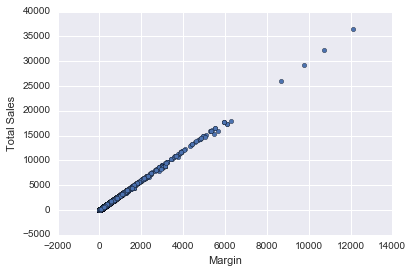

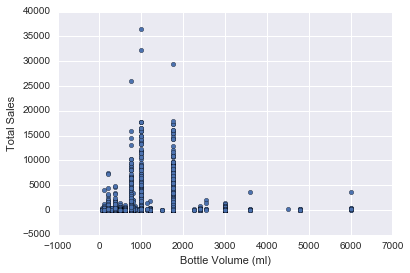

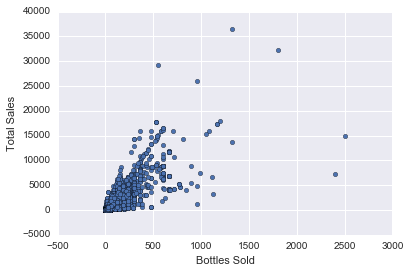

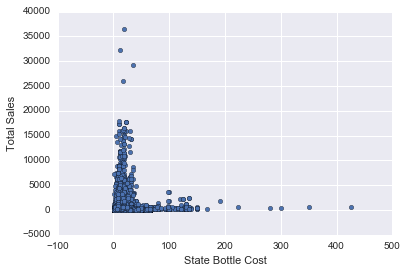

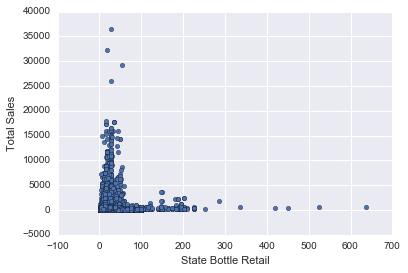

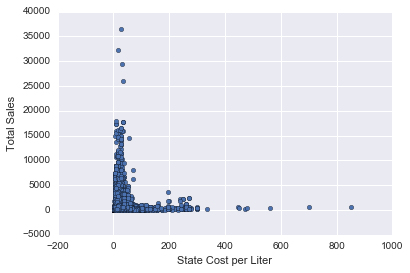

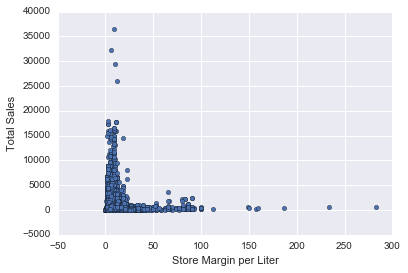

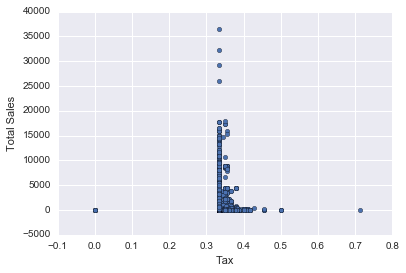

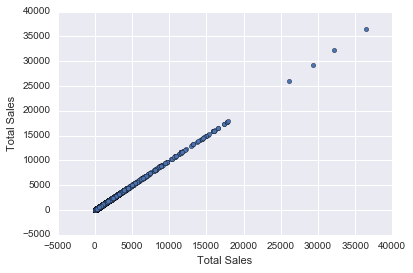

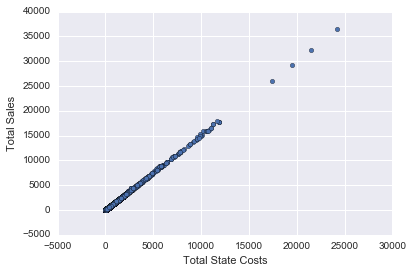

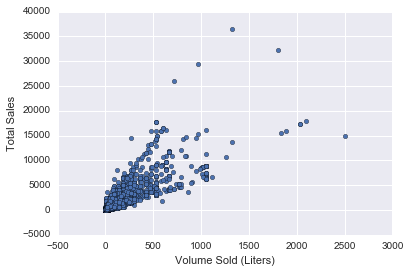

In [379]:
for column in ["Margin", "Bottle Volume (ml)", "Bottles Sold", "State Bottle Cost", "State Bottle Retail", "State Cost per Liter", "Store Margin per Liter", "Tax", "Total Sales", "Total State Costs", "Volume Sold (Liters)" ]:
    df.plot.scatter(x=column, y="Total Sales")

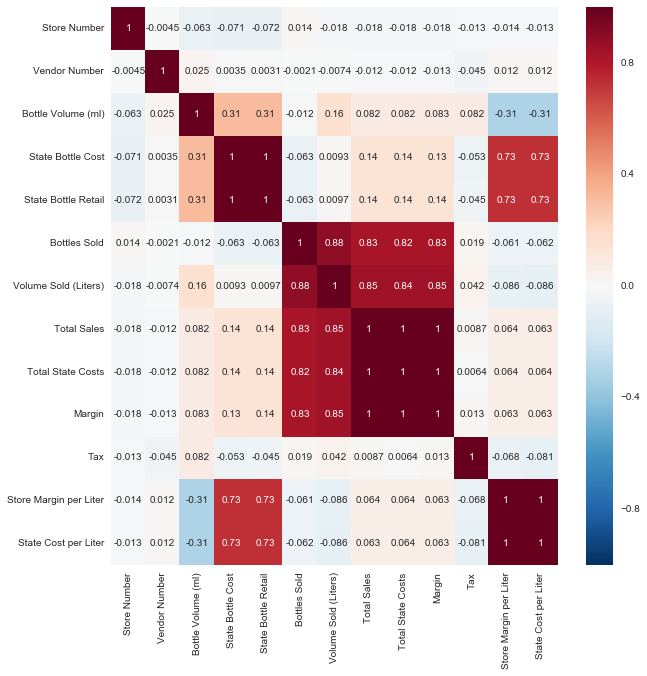

In [367]:
corr = df.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True)

# Total Sales by Store

In [85]:
storeTotalSales = df.groupby('Store Number').sum()
storeTotalSales.head(2)

Vendor Number  Bottle Volume (ml)  State Bottle Cost  \
Store Number                                                         
2106                 175772              597350            6753.92   
2113                  43223              175625            1994.22   

              State Bottle Retail  Bottles Sold  Volume Sold (Liters)  \
Store Number                                                            
2106                     10138.83       12587.0              11849.60   
2113                      2993.26         830.0                836.85   

              Total Sales  Total State Costs    Margin         Tax  \
Store Number                                                         
2106            176849.97          117822.21  59027.76  218.480180   
2113             11376.12            7573.59   3802.53   61.443994   

              Store Margin per Liter  State Cost per Liter  
Store Number                                                
2106                     3907.091667          11704.619524  
2113                     1123.406190           3367.503810

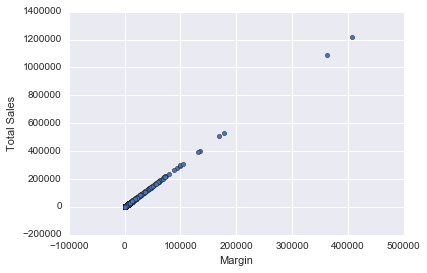

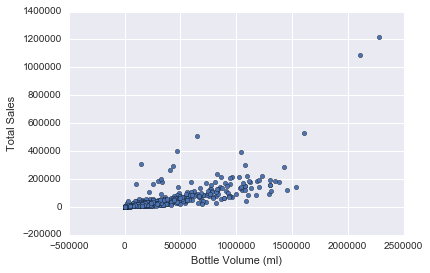

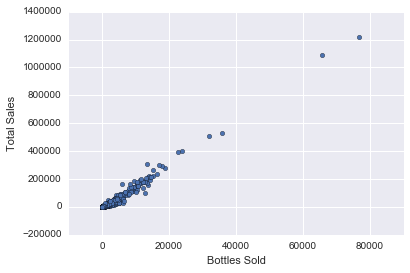

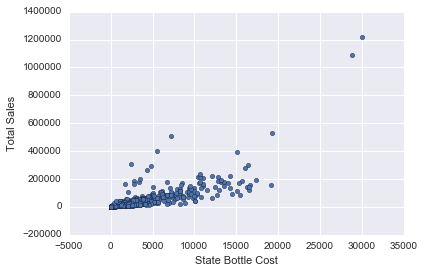

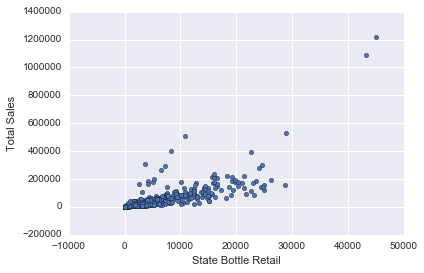

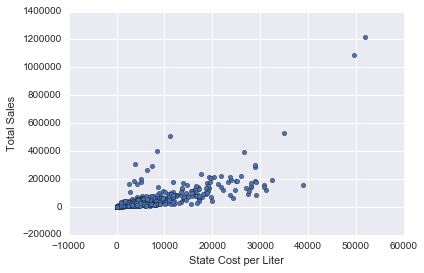

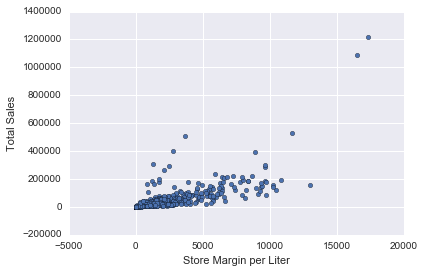

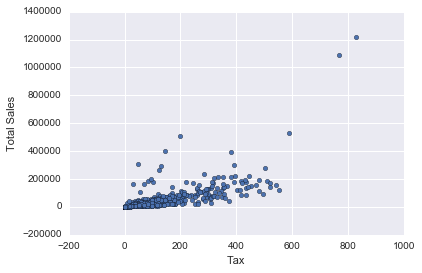

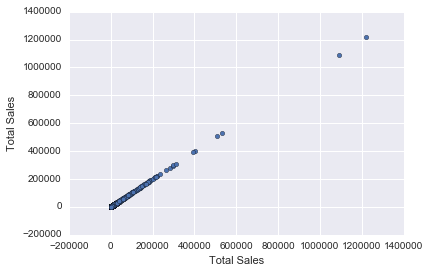

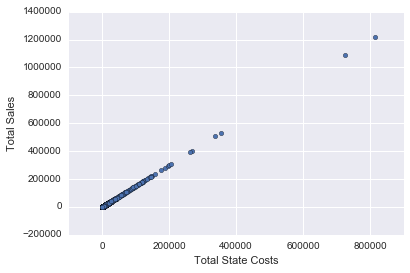

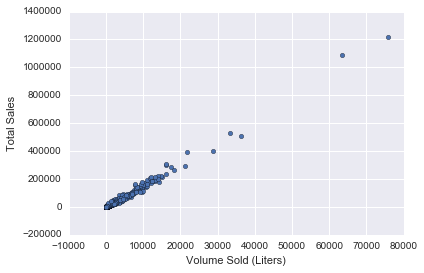

In [356]:

for column in ["Margin", "Bottle Volume (ml)", "Bottles Sold", "State Bottle Cost", "State Bottle Retail", "State Cost per Liter", "Store Margin per Liter", "Tax", "Total Sales", "Total State Costs", "Volume Sold (Liters)" ]:
    storeTotalSales.plot.scatter(x=column, y="Total Sales")


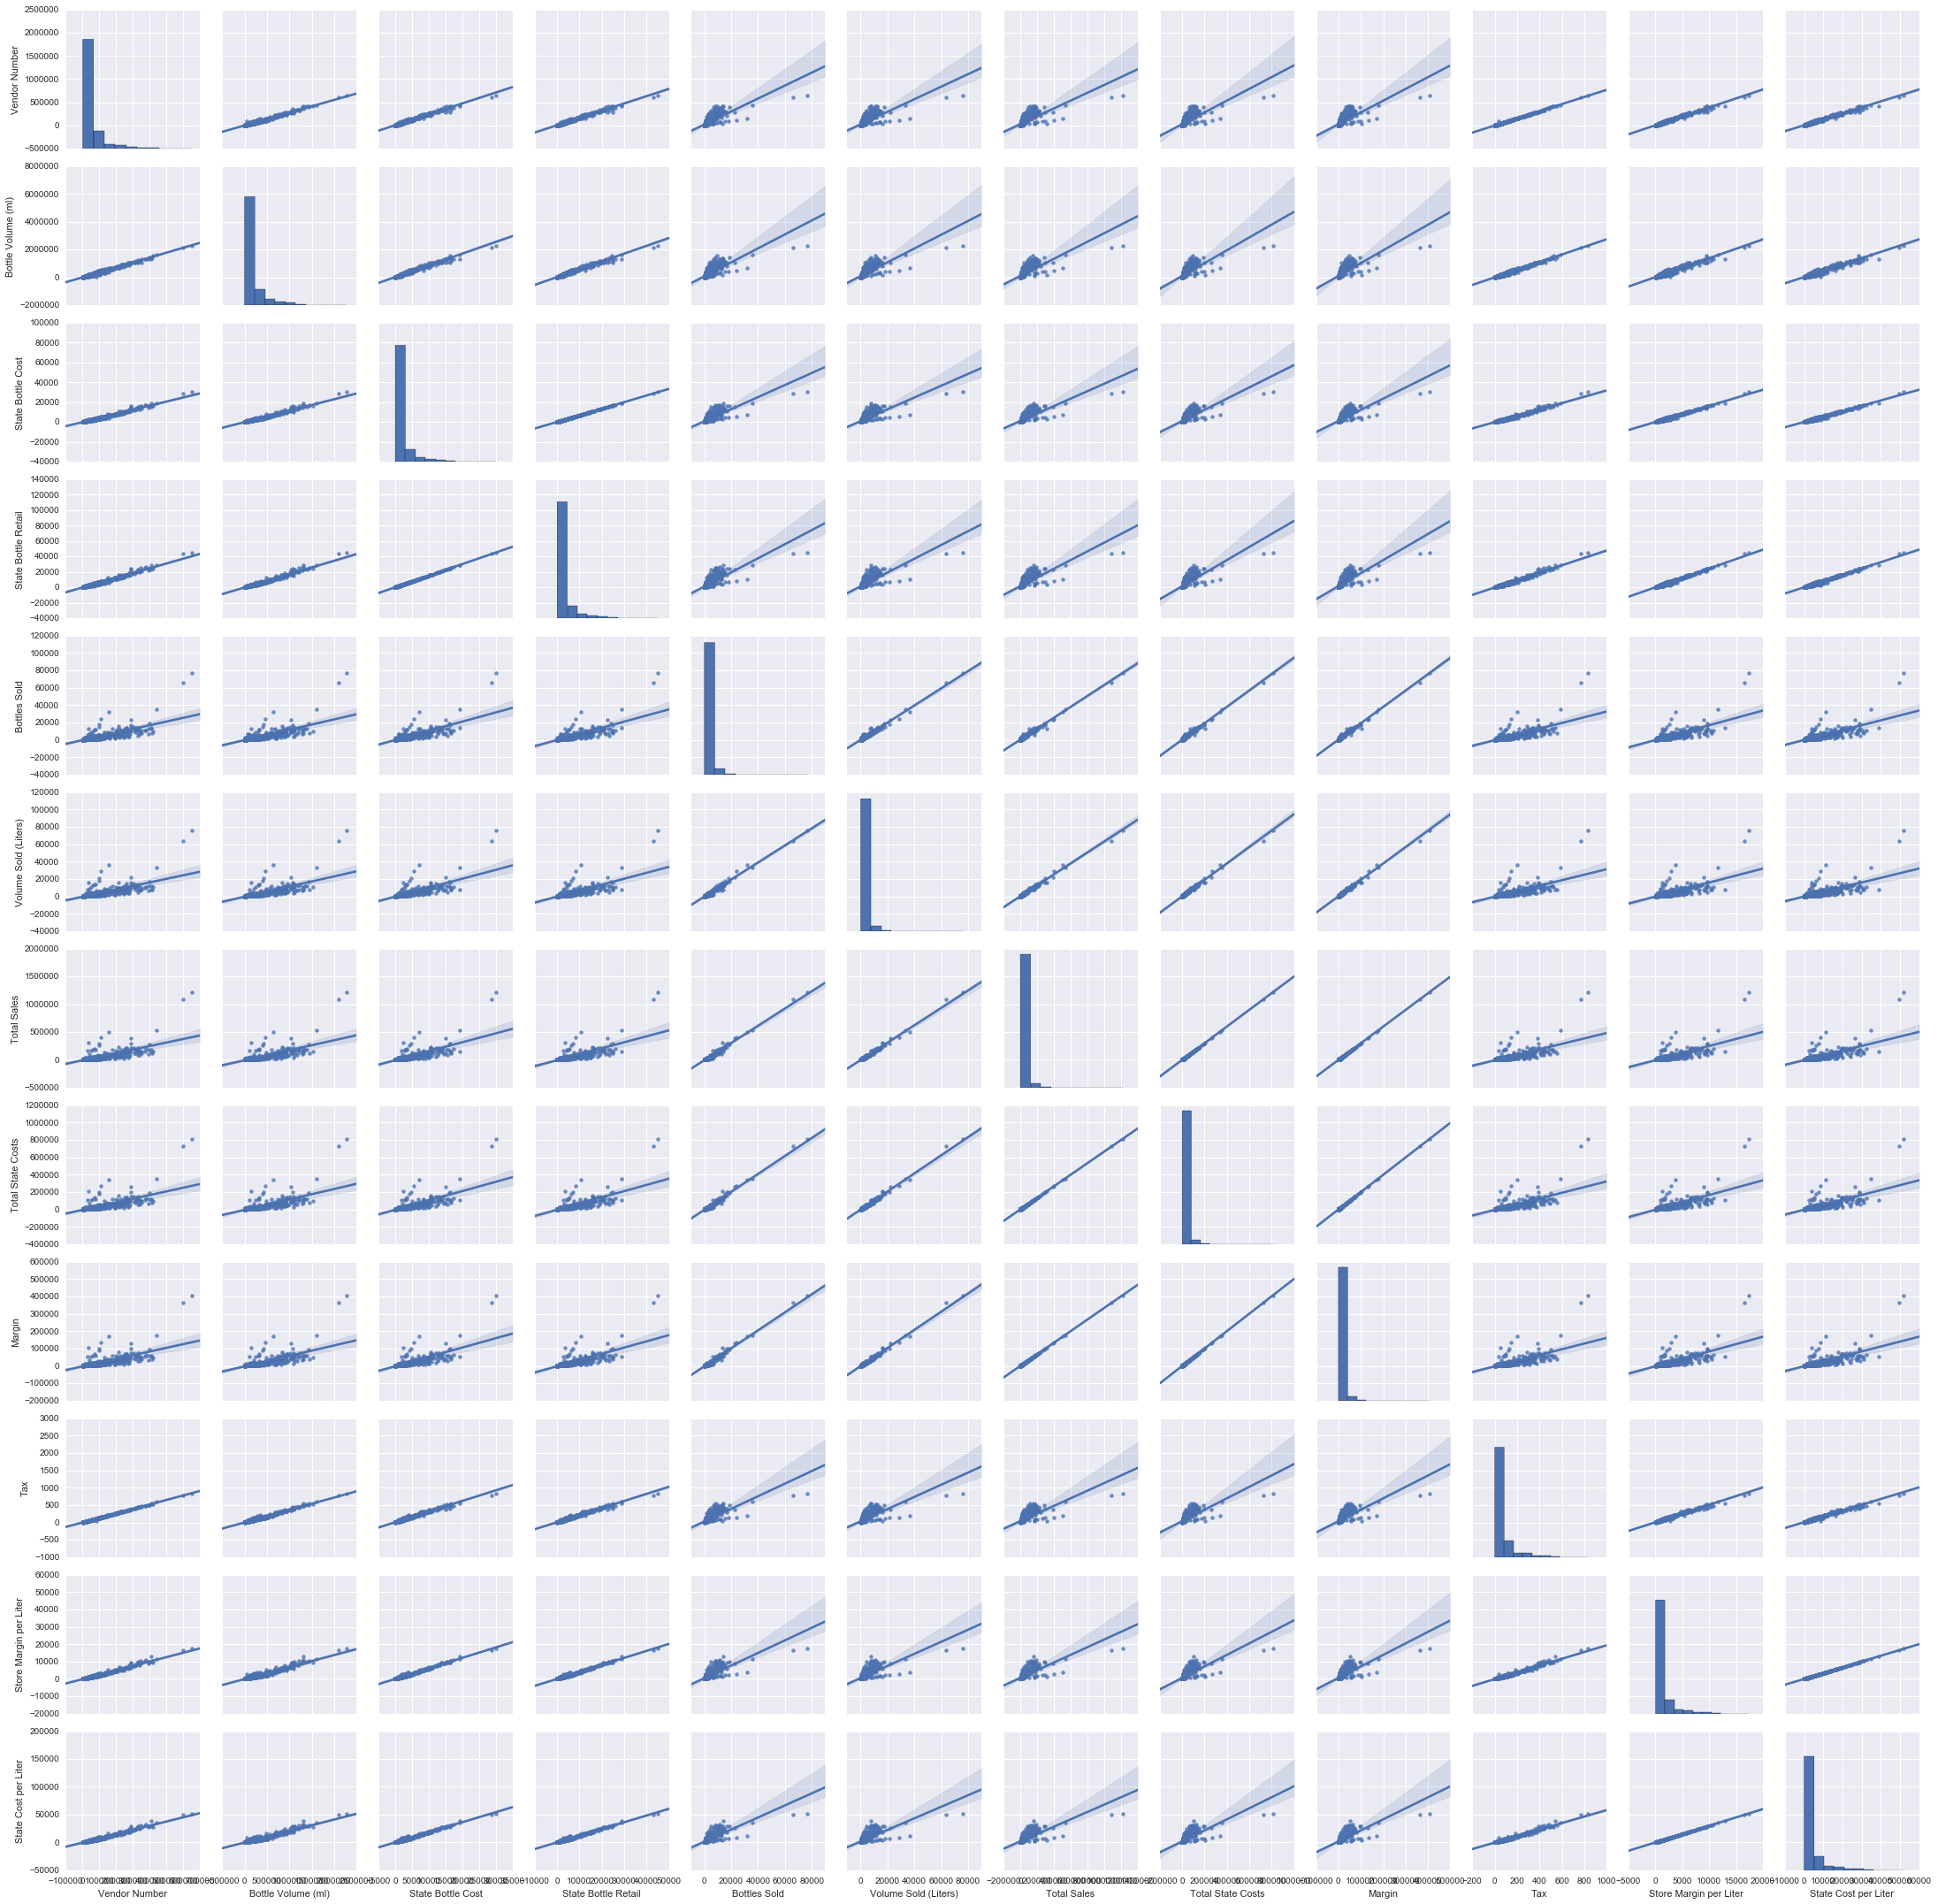

In [369]:
sns.pairplot(storeTotalSales, kind = 'reg')

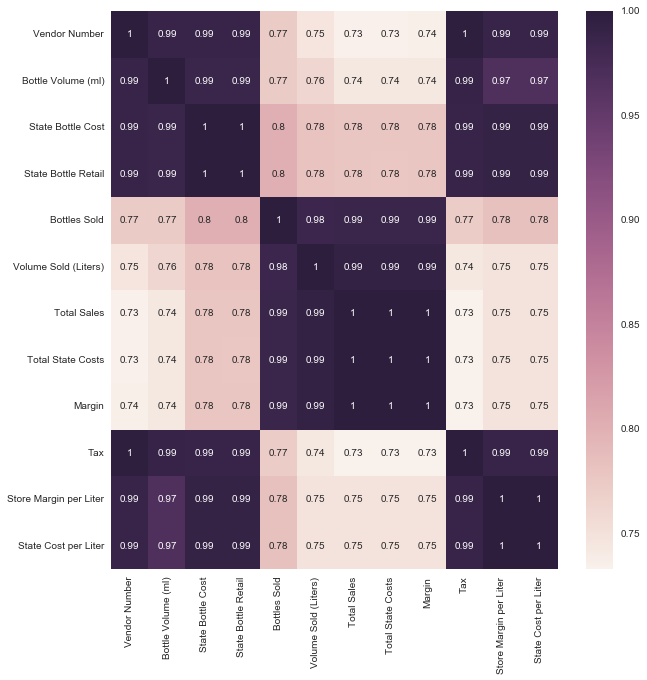

In [368]:
corr = storeTotalSales.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True)

# Mean of Sales by Store

In [86]:
storeMeanSales = df.groupby('Store Number').mean()
storeMeanSales.head(2)

Vendor Number  Bottle Volume (ml)  State Bottle Cost  \
Store Number                                                         
2106             268.764526          913.379205          10.327095   
2113             234.907609          954.483696          10.838152   

              State Bottle Retail  Bottles Sold  Volume Sold (Liters)  \
Store Number                                                            
2106                    15.502798     19.246177             18.118654   
2113                    16.267717      4.510870              4.548098   

              Total Sales  Total State Costs     Margin       Tax  \
Store Number                                                        
2106           270.412798         180.156284  90.256514  0.334068   
2113            61.826739          41.160815  20.665924  0.333935   

              Store Margin per Liter  State Cost per Liter  
Store Number                                                
2106                        5.974146             17.896972  
2113                        6.105468             18.301651

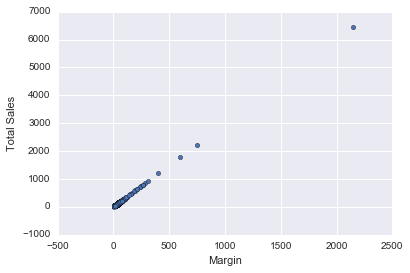

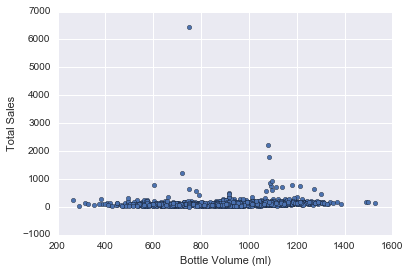

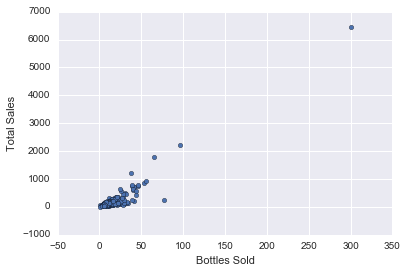

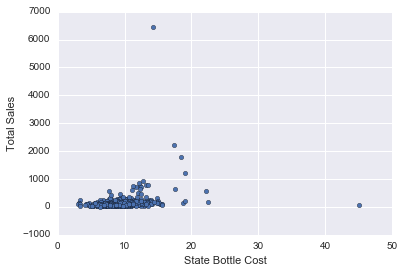

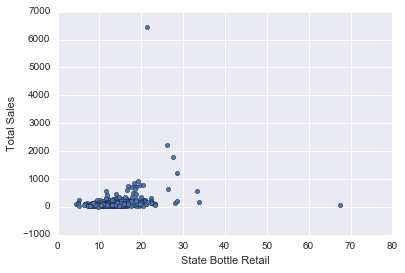

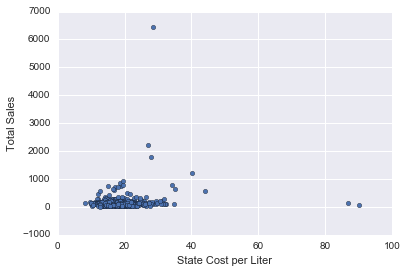

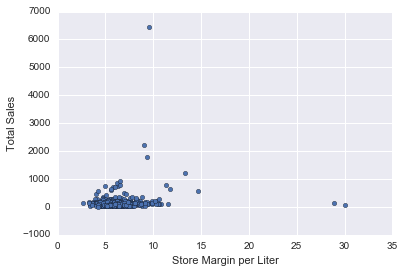

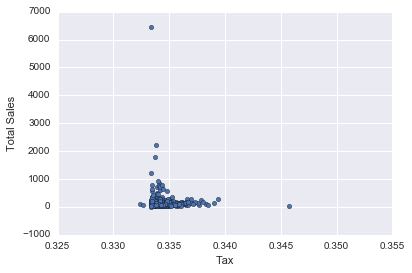

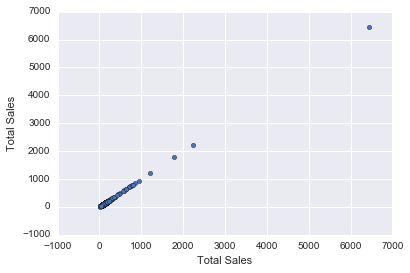

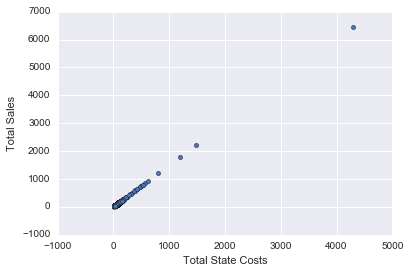

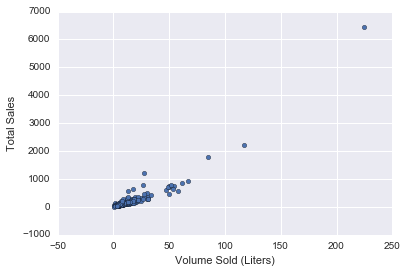

In [354]:

for column in ["Margin", "Bottle Volume (ml)", "Bottles Sold", "State Bottle Cost", "State Bottle Retail", "State Cost per Liter", "Store Margin per Liter", "Tax", "Total Sales", "Total State Costs", "Volume Sold (Liters)" ]:
    storeMeanSales.plot.scatter(x=column, y="Total Sales")


In [ ]:
sns.pairplot(storeMeanSales, kind = 'reg')

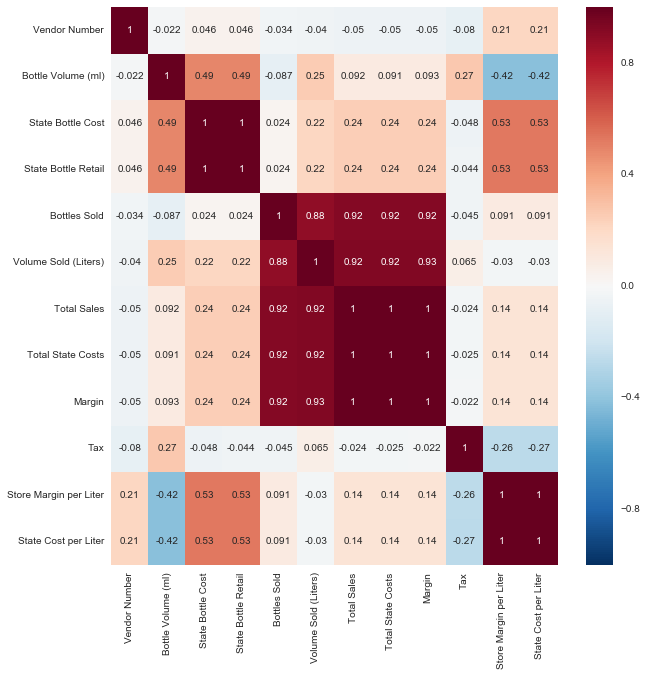

In [370]:
corr = storeMeanSales.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True)

# Total Sales by Category

In [88]:
categoryTotalSales = df.groupby('Category Name').sum()
categoryTotalSales.head(2)

Store Number  Vendor Number  Bottle Volume (ml)  \
Category Name                                                          
100 PROOF VODKA          12360784        1028261             3690500   
AMARETTO - IMPORTED          6760           1491                2250   

                     State Bottle Cost  State Bottle Retail  Bottles Sold  \
Category Name                                                               
100 PROOF VODKA               19292.99             28954.42       33566.0   
AMARETTO - IMPORTED              93.39               140.10          48.0   

                     Volume Sold (Liters)  Total Sales  Total State Costs  \
Category Name                                                               
100 PROOF VODKA                  34309.46    274591.07          182960.95   
AMARETTO - IMPORTED                 36.00      2241.60            1494.24   

                       Margin          Tax  Store Margin per Liter  \
Category Name                                                        
100 PROOF VODKA      91630.12  1102.815602             9551.654112   
AMARETTO - IMPORTED    747.36     1.000214               62.280000   

                     State Cost per Liter  
Category Name                              
100 PROOF VODKA              28619.396432  
AMARETTO - IMPORTED            186.800000

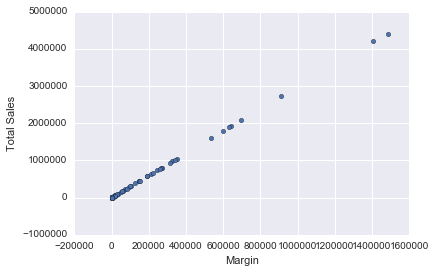

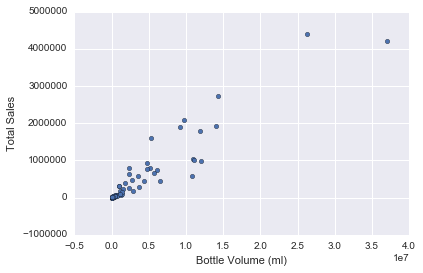

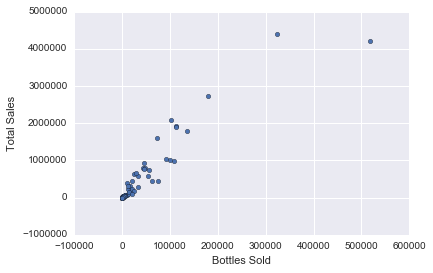

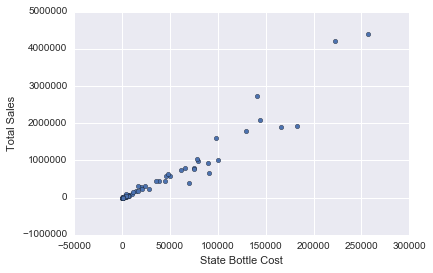

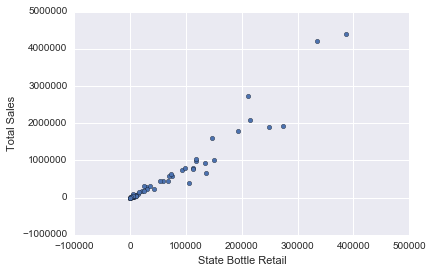

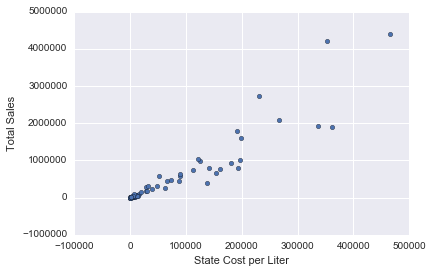

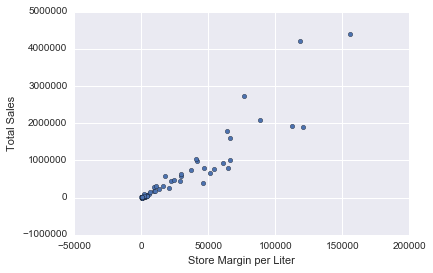

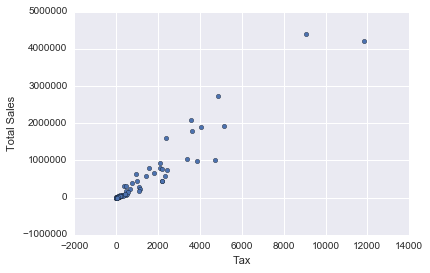

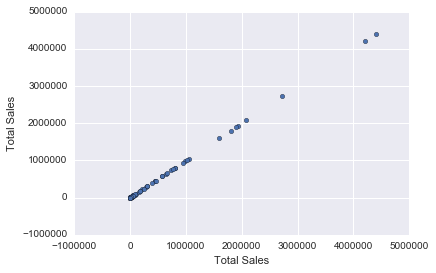

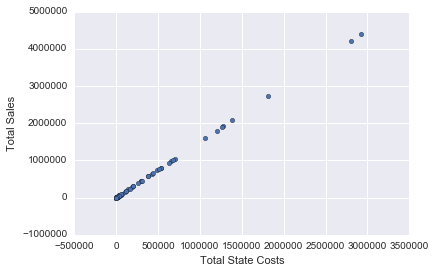

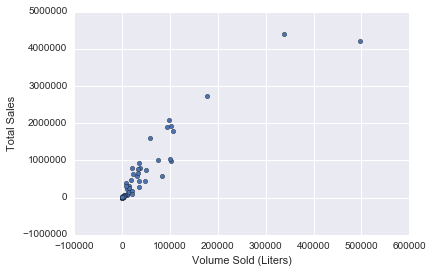

In [352]:

for column in ["Margin", "Bottle Volume (ml)", "Bottles Sold", "State Bottle Cost", "State Bottle Retail", "State Cost per Liter", "Store Margin per Liter", "Tax", "Total Sales", "Total State Costs", "Volume Sold (Liters)" ]:
    categoryTotalSales.plot.scatter(x=column, y="Total Sales")


In [ ]:
sns.pairplot(categoryTotalSales, kind = 'reg')

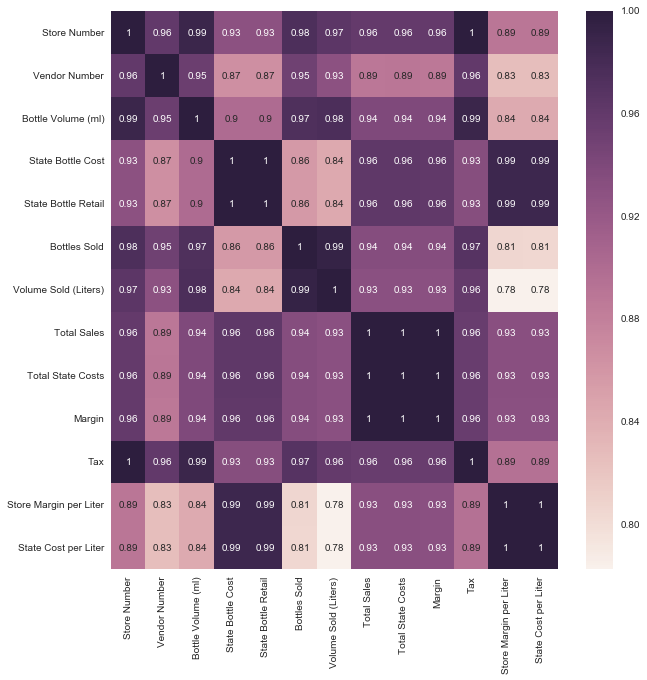

In [371]:
corr = categoryTotalSales.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True)

# Mean of Sales by Category

In [89]:
categoryMeanSales = df.groupby('Category Name').mean()
categoryMeanSales.head(2)

Store Number  Vendor Number  Bottle Volume (ml)  \
Category Name                                                          
100 PROOF VODKA       3741.157385      311.21701         1116.979419   
AMARETTO - IMPORTED   2253.333333      497.00000          750.000000   

                     State Bottle Cost  State Bottle Retail  Bottles Sold  \
Category Name                                                               
100 PROOF VODKA               5.839283             8.763444     10.159201   
AMARETTO - IMPORTED          31.130000            46.700000     16.000000   

                     Volume Sold (Liters)  Total Sales  Total State Costs  \
Category Name                                                               
100 PROOF VODKA                 10.384219    83.108677           55.37559   
AMARETTO - IMPORTED             12.000000   747.200000          498.08000   

                         Margin       Tax  Store Margin per Liter  \
Category Name                                                       
100 PROOF VODKA       27.733087  0.333782                2.890936   
AMARETTO - IMPORTED  249.120000  0.333405               20.760000   

                     State Cost per Liter  
Category Name                              
100 PROOF VODKA                  8.662045  
AMARETTO - IMPORTED             62.266667

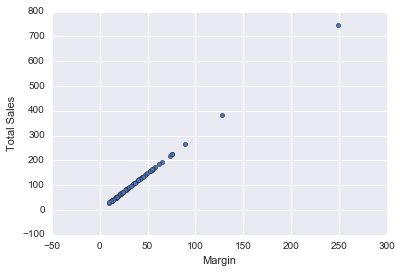

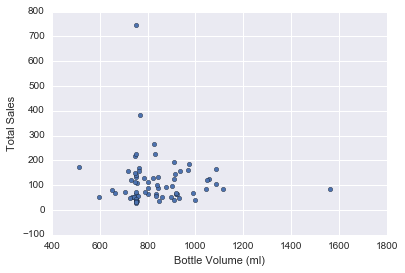

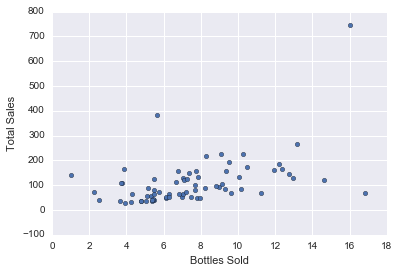

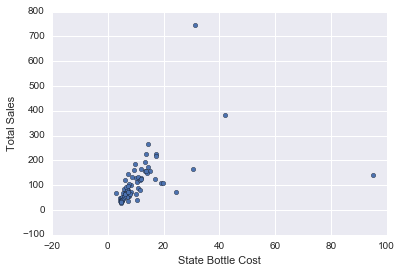

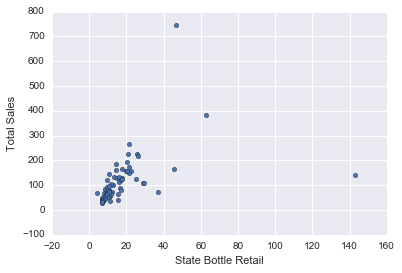

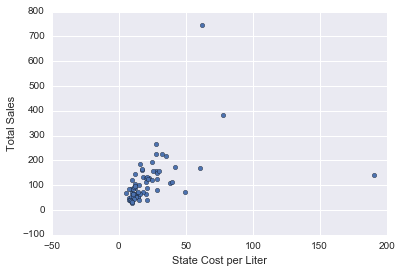

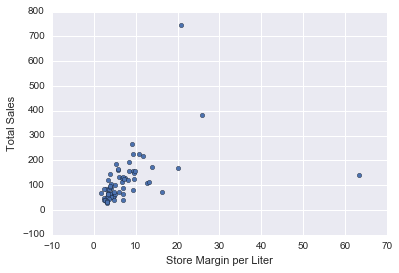

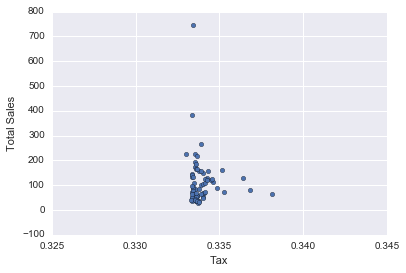

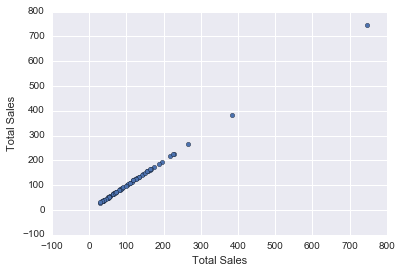

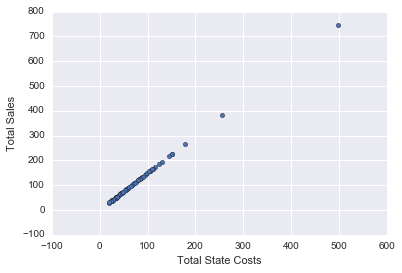

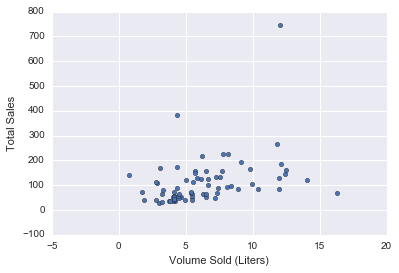

In [351]:

for column in ["Margin", "Bottle Volume (ml)", "Bottles Sold", "State Bottle Cost", "State Bottle Retail", "State Cost per Liter", "Store Margin per Liter", "Tax", "Total Sales", "Total State Costs", "Volume Sold (Liters)" ]:
    categoryMeanSales.plot.scatter(x=column, y="Total Sales")


In [ ]:
sns.pairplot(categoryMeanSales, kind = 'reg')

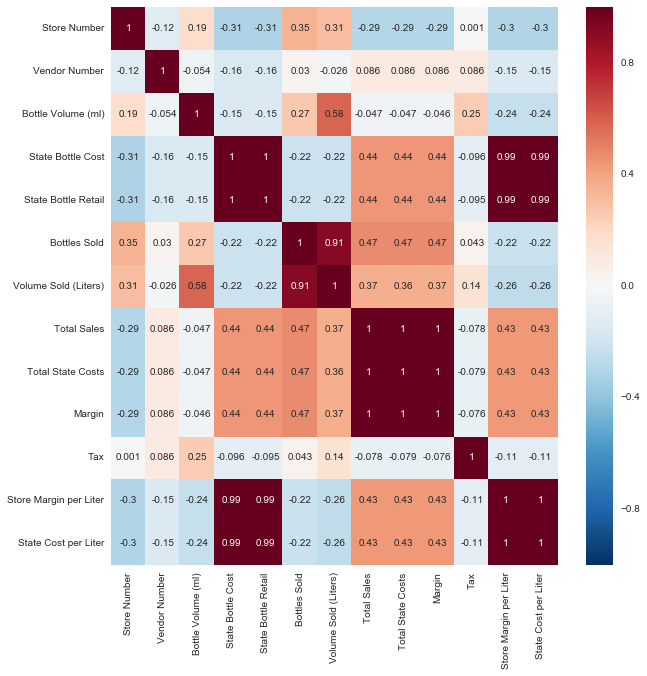

In [372]:
corr = categoryMeanSales.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True)

# Total Sales by Zip Code 

In [349]:
zipTotalSales = df.groupby('Zip Code').sum()
zipTotalSales.head(2)

Store Number  Vendor Number  Bottle Volume (ml)  State Bottle Cost  \
Zip Code                                                                       
50002           194635          12149               36875             338.79   
50003          1453199          79890              295350            2689.40   

          State Bottle Retail  Bottles Sold  Volume Sold (Liters)  \
Zip Code                                                            
50002                  510.28         588.0                391.35   
50003                 4040.10        3637.0               3522.00   

          Total Sales  Total State Costs    Margin         Tax  \
Zip Code                                                         
50002          5851.2            3889.88   1961.32   14.430713   
50003         47716.1           31753.50  15962.60  106.314217   

          Store Margin per Liter  State Cost per Liter  
Zip Code                                                
50002                 234.207143            699.270476  
50003                1672.488341           5007.997166

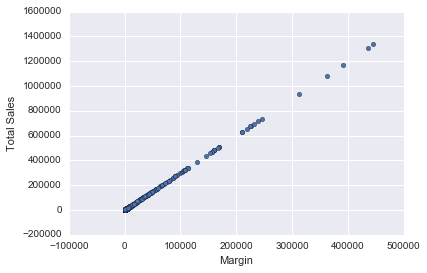

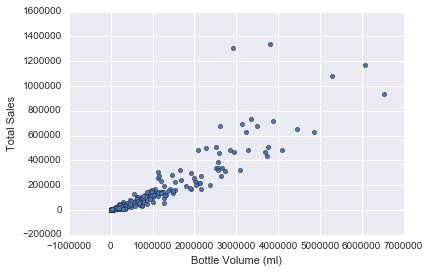

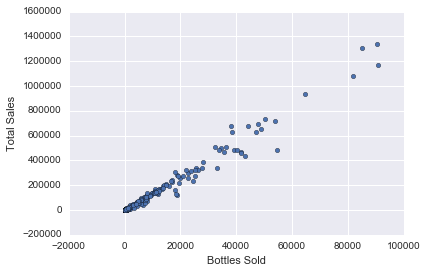

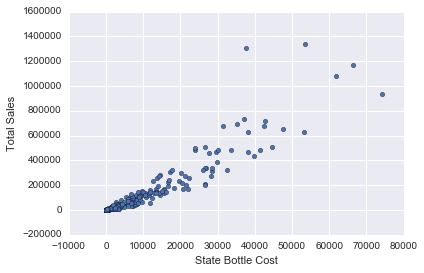

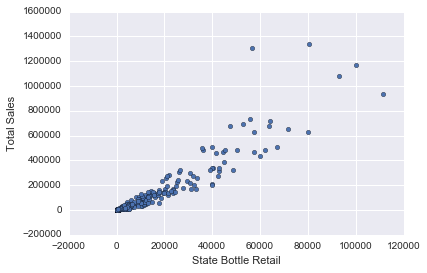

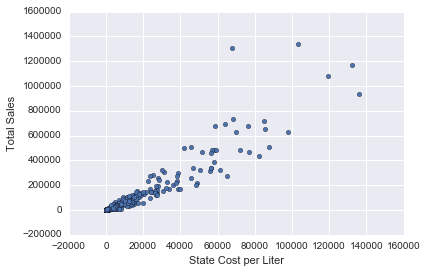

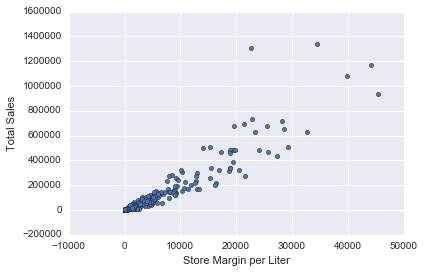

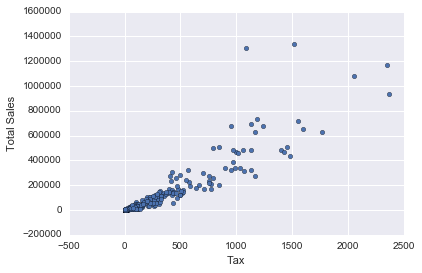

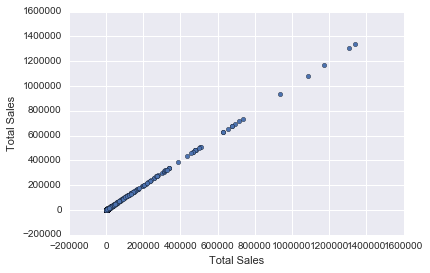

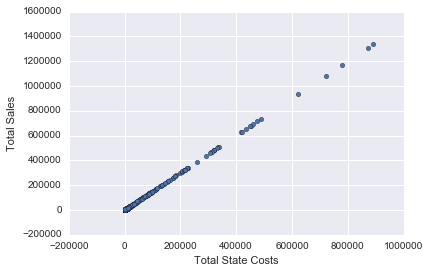

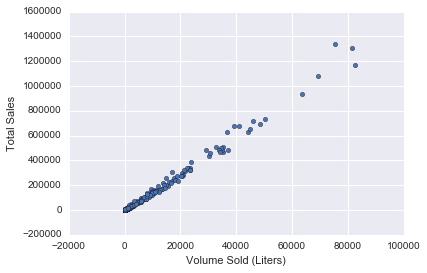

In [353]:

for column in ["Margin", "Bottle Volume (ml)", "Bottles Sold", "State Bottle Cost", "State Bottle Retail", "State Cost per Liter", "Store Margin per Liter", "Tax", "Total Sales", "Total State Costs", "Volume Sold (Liters)" ]:
    zipTotalSales.plot.scatter(x=column, y="Total Sales")


In [ ]:
sns.pairplot(zipTotalSales, kind = 'reg')

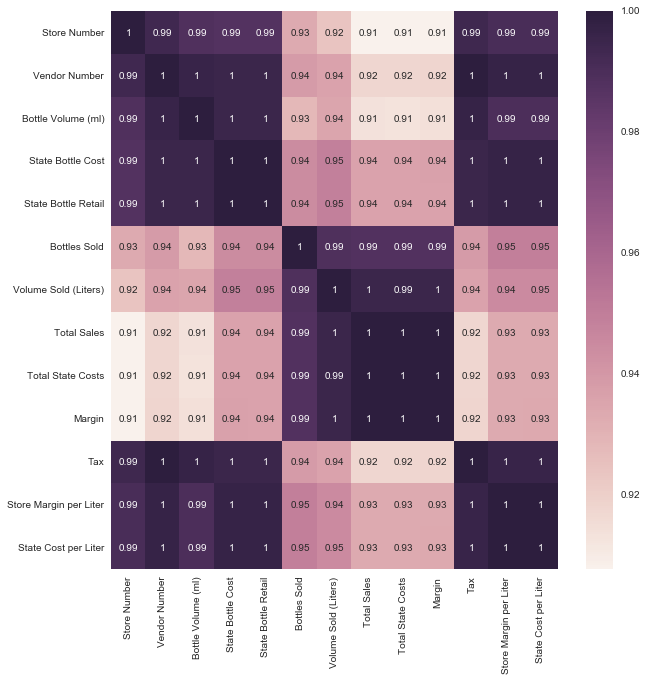

In [373]:
corr = zipTotalSales.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True)

# Mean of sales by Zip Code

In [357]:
zipMeanSales = df.groupby('Zip Code').mean()
zipMeanSales.head(2)

Store Number  Vendor Number  Bottle Volume (ml)  State Bottle Cost  \
Zip Code                                                                       
50002      4526.395349     282.534884          857.558140           7.878837   
50003      4569.808176     251.226415          928.773585           8.457233   

          State Bottle Retail  Bottles Sold  Volume Sold (Liters)  \
Zip Code                                                            
50002               11.866977     13.674419              9.101163   
50003               12.704717     11.437107             11.075472   

          Total Sales  Total State Costs     Margin       Tax  \
Zip Code                                                        
50002      136.074419          90.462326  45.612093  0.335598   
50003      150.050629          99.853774  50.196855  0.334321   

          Store Margin per Liter  State Cost per Liter  
Zip Code                                                
50002                   5.446678             16.262104  
50003                   5.259397             15.748419

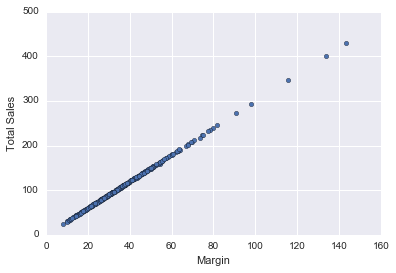

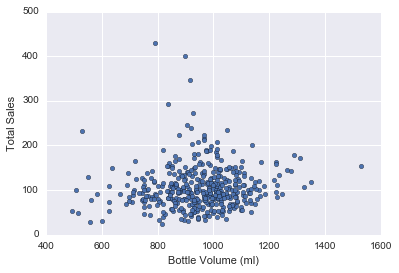

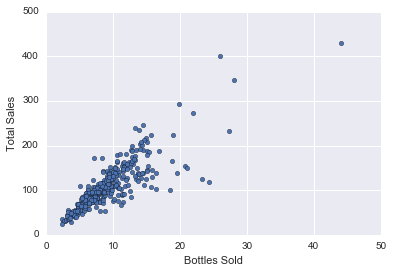

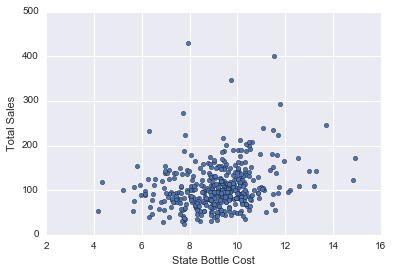

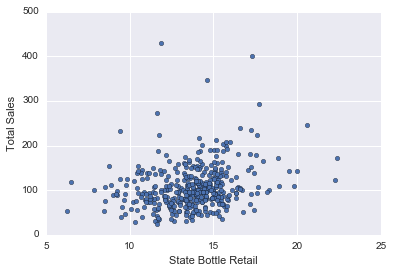

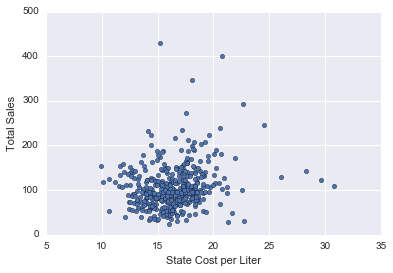

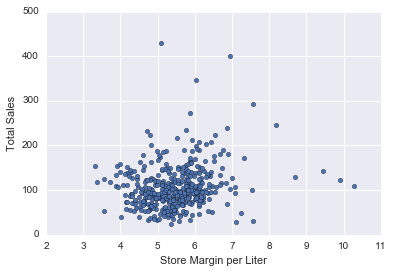

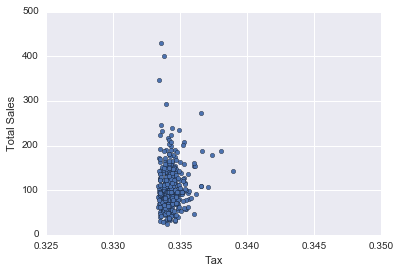

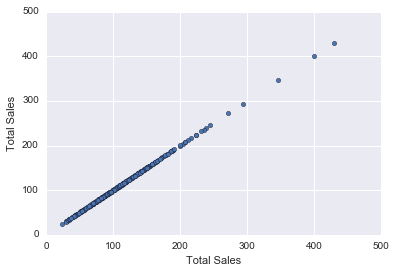

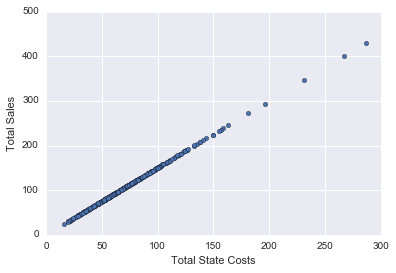

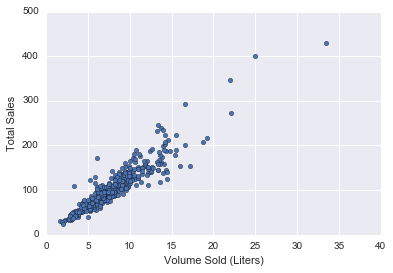

In [358]:

for column in ["Margin", "Bottle Volume (ml)", "Bottles Sold", "State Bottle Cost", "State Bottle Retail", "State Cost per Liter", "Store Margin per Liter", "Tax", "Total Sales", "Total State Costs", "Volume Sold (Liters)" ]:
    zipMeanSales.plot.scatter(x=column, y="Total Sales")

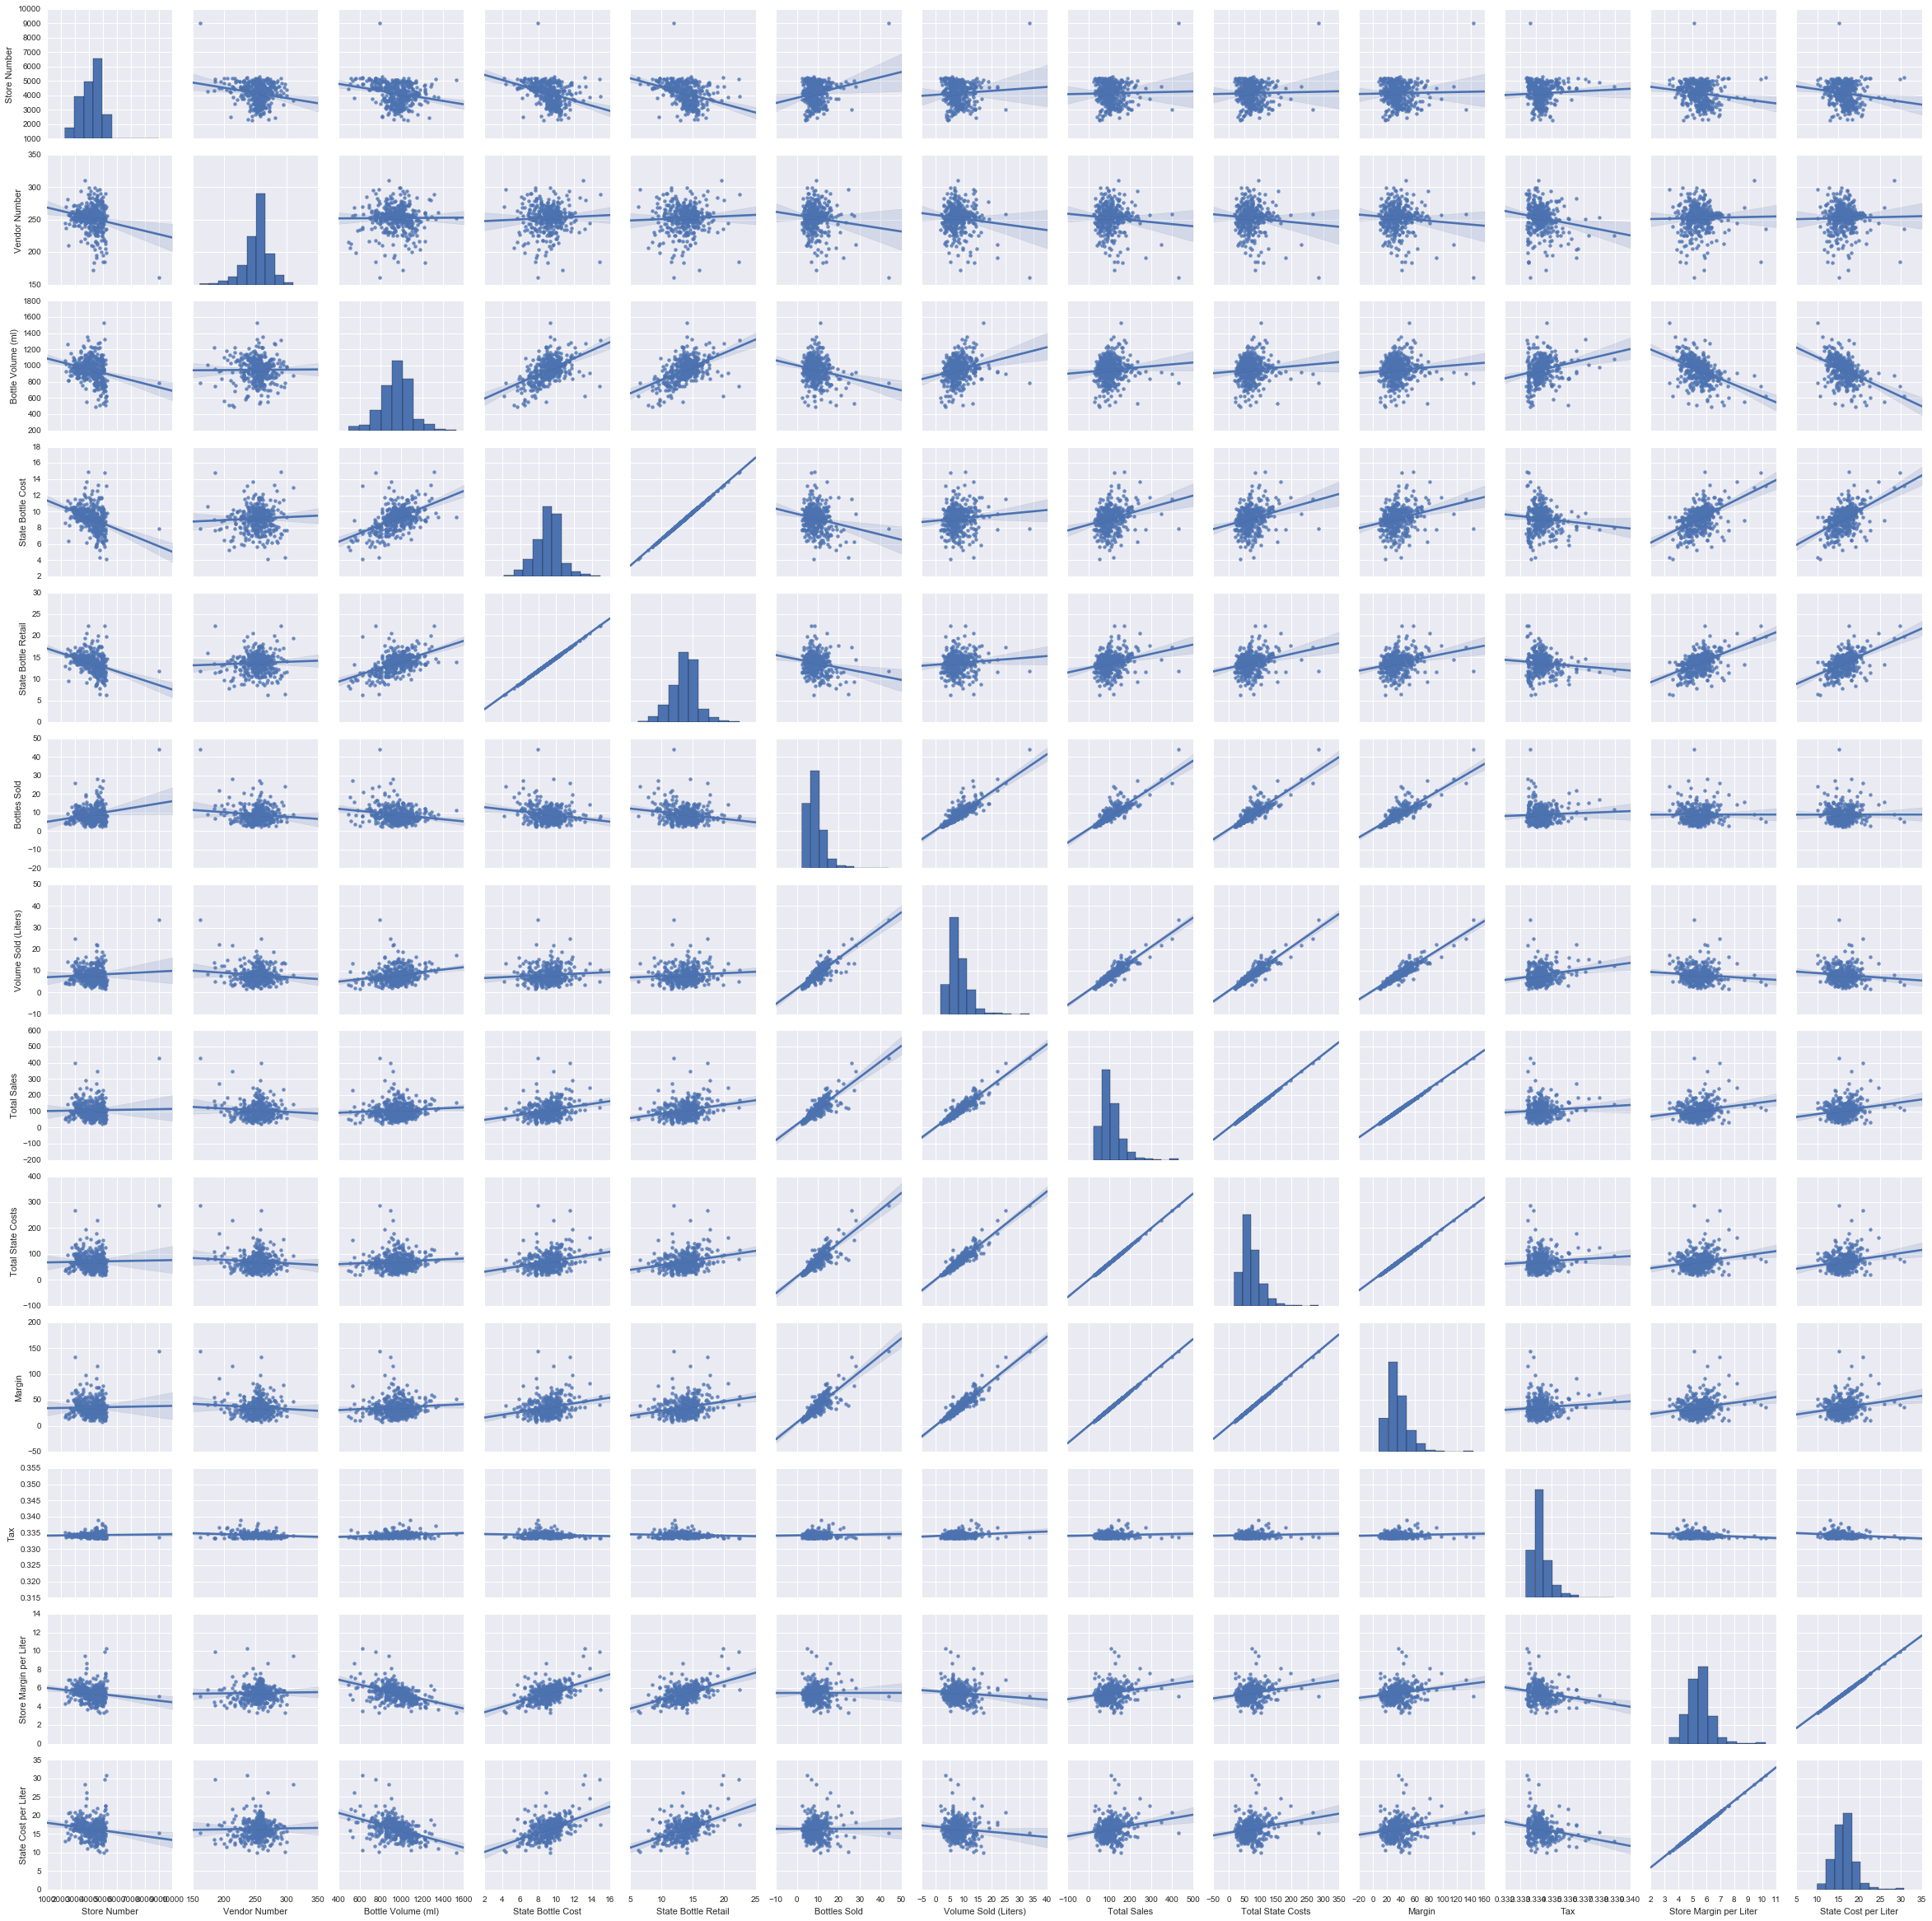

In [362]:
sns.pairplot(zipMeanSales, kind = 'reg')

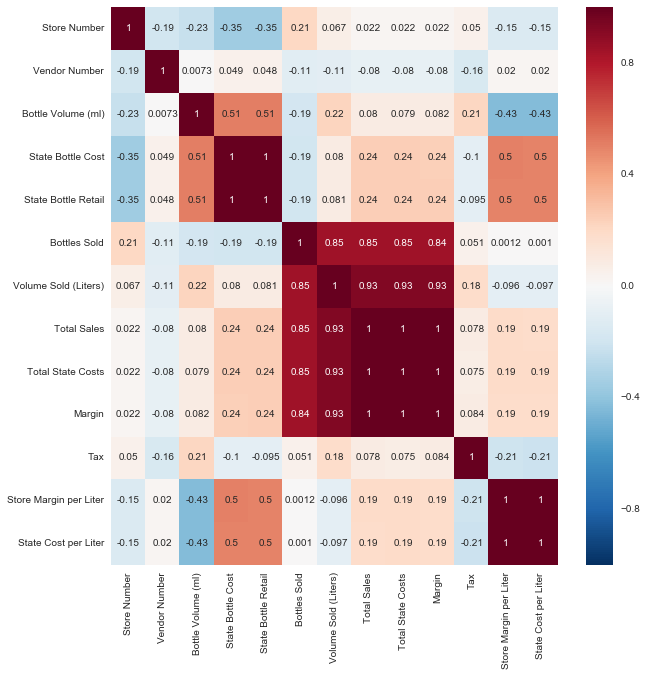

In [374]:
corr = zipMeanSales.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True)

# Total Sales by City

In [360]:
cityTotalSales = df.groupby('City').sum()
cityTotalSales.head(2)

Store Number  Vendor Number  Bottle Volume (ml)  State Bottle Cost  \
City                                                                         
ACKLEY        424023          23861              105300             990.61   
ADAIR         194635          12149               36875             338.79   

        State Bottle Retail  Bottles Sold  Volume Sold (Liters)  Total Sales  \
City                                                                           
ACKLEY              1487.51         648.0                679.28       8305.0   
ADAIR                510.28         588.0                391.35       5851.2   

        Total State Costs   Margin        Tax  Store Margin per Liter  \
City                                                                    
ACKLEY            5527.17  2777.83  35.080419              572.055890   
ADAIR             3889.88  1961.32  14.430713              234.207143   

        State Cost per Liter  
City                          
ACKLEY           1714.009527  
ADAIR             699.270476

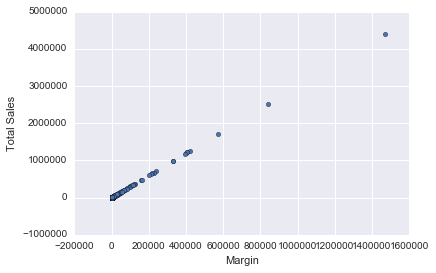

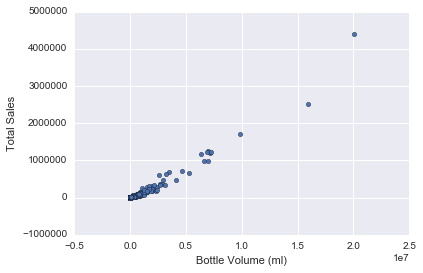

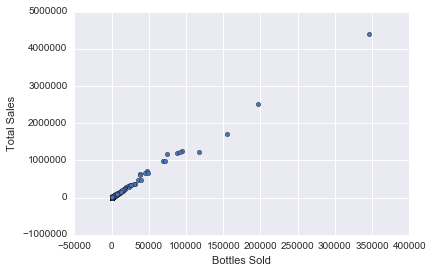

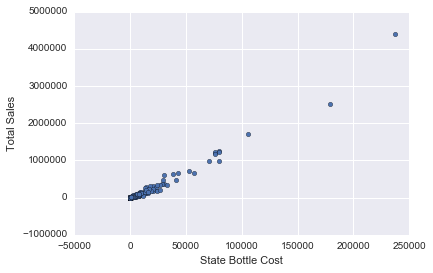

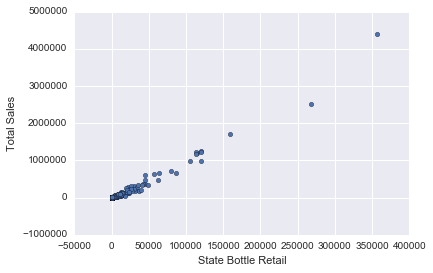

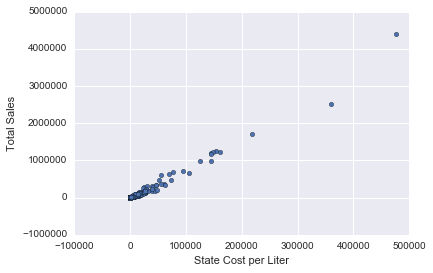

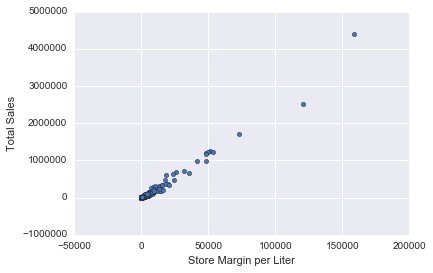

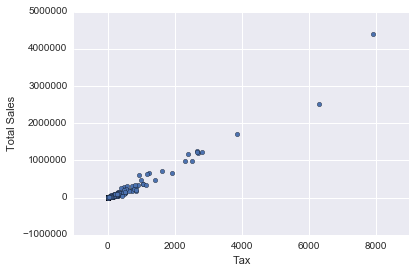

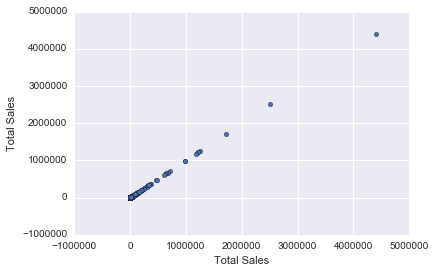

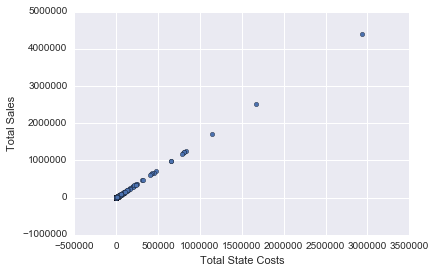

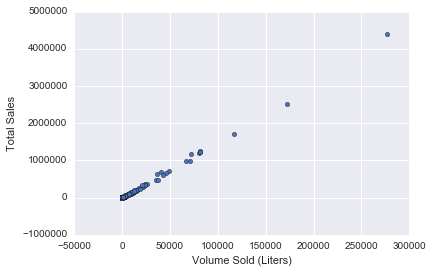

In [361]:

for column in ["Margin", "Bottle Volume (ml)", "Bottles Sold", "State Bottle Cost", "State Bottle Retail", "State Cost per Liter", "Store Margin per Liter", "Tax", "Total Sales", "Total State Costs", "Volume Sold (Liters)" ]:
    cityTotalSales.plot.scatter(x=column, y="Total Sales")

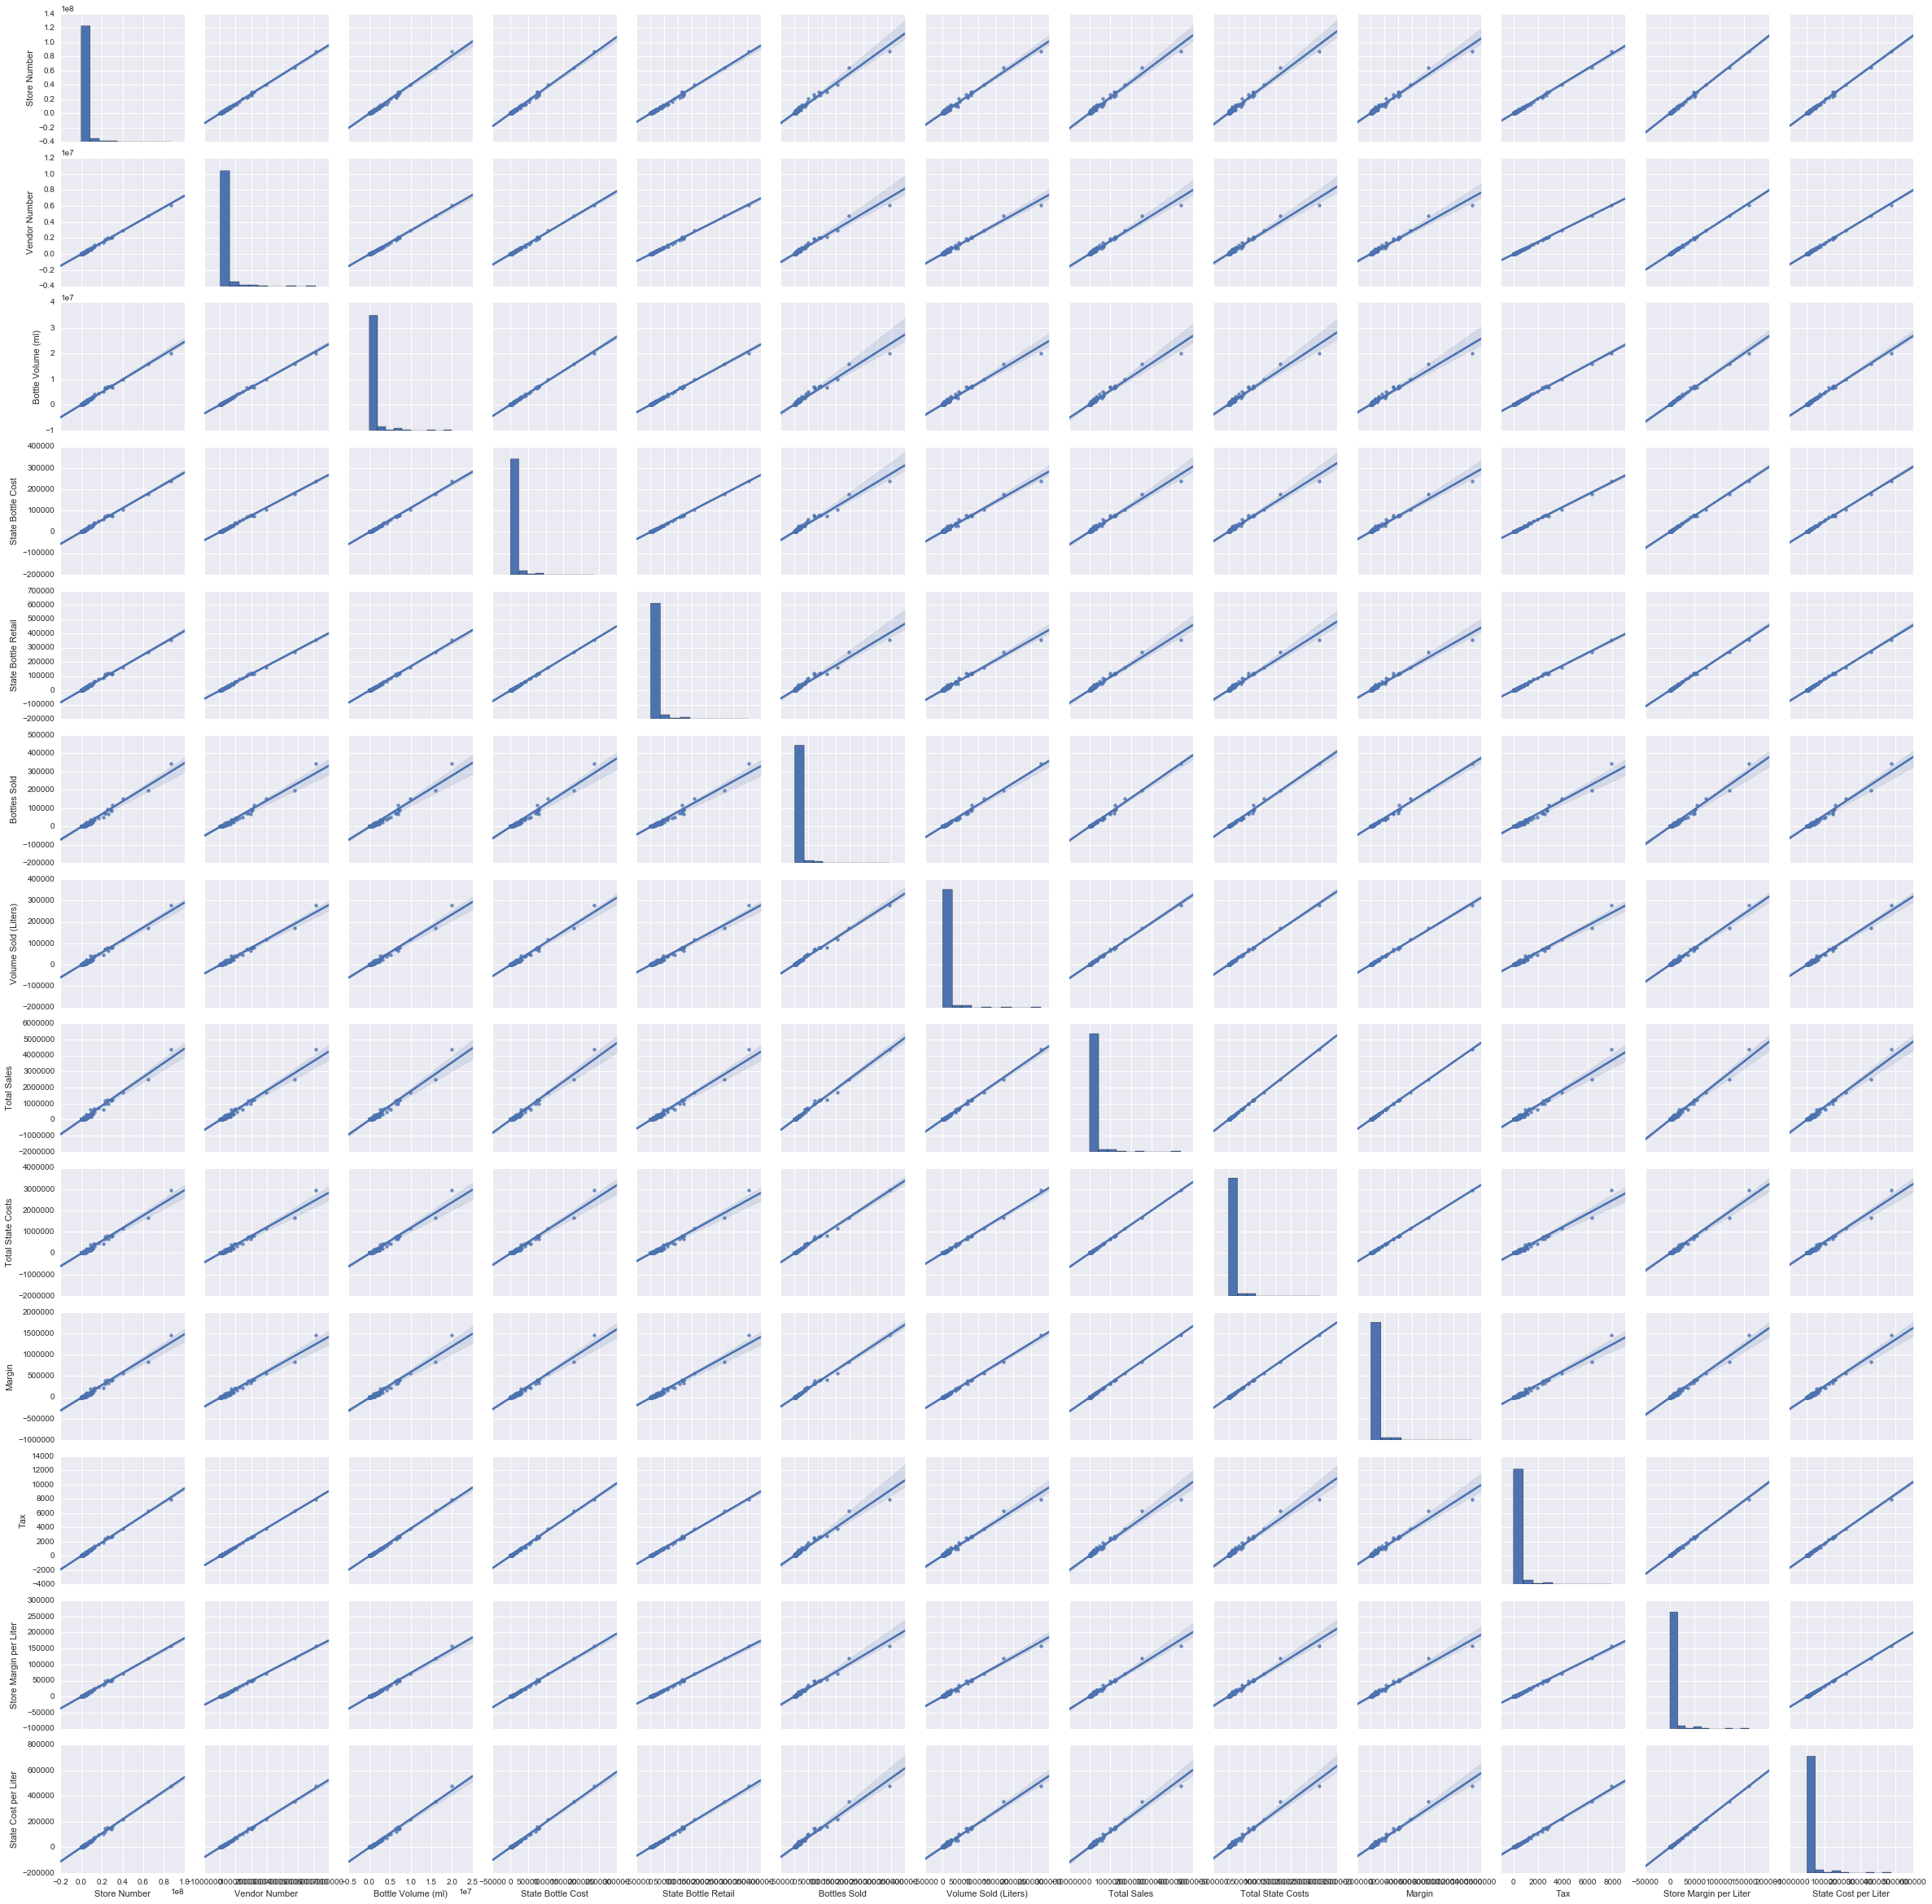

In [365]:
sns.pairplot(cityTotalSales, kind = 'reg')

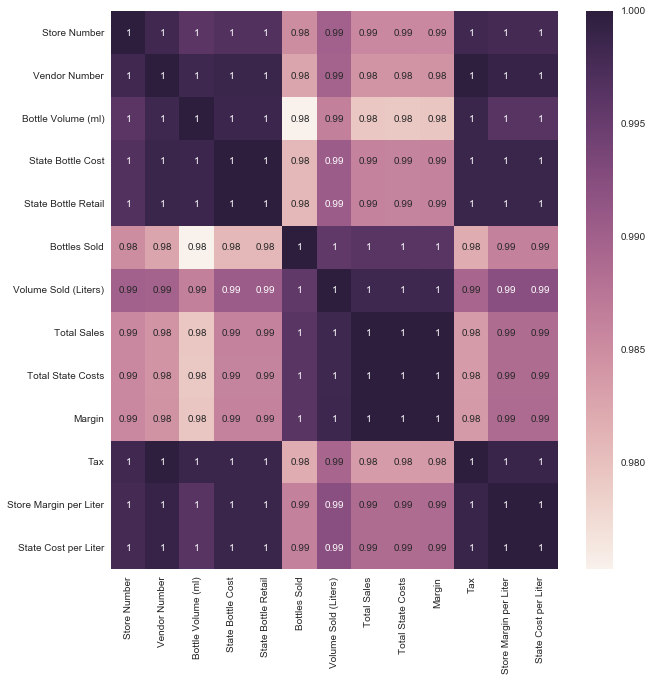

In [375]:
corr = cityTotalSales.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True)

# Mean Sales by City

In [363]:
cityMeanSales = df.groupby('City').mean()
cityMeanSales.head(2)

Store Number  Vendor Number  Bottle Volume (ml)  State Bottle Cost  \
City                                                                         
ACKLEY   4038.314286     227.247619         1002.857143           9.434381   
ADAIR    4526.395349     282.534884          857.558140           7.878837   

        State Bottle Retail  Bottles Sold  Volume Sold (Liters)  Total Sales  \
City                                                                           
ACKLEY            14.166762      6.171429              6.469333    79.095238   
ADAIR             11.866977     13.674419              9.101163   136.074419   

        Total State Costs     Margin       Tax  Store Margin per Liter  \
City                                                                     
ACKLEY          52.639714  26.455524  0.334099                5.448151   
ADAIR           90.462326  45.612093  0.335598                5.446678   

        State Cost per Liter  
City                          
ACKLEY             16.323900  
ADAIR              16.262104

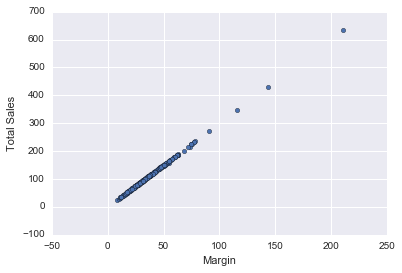

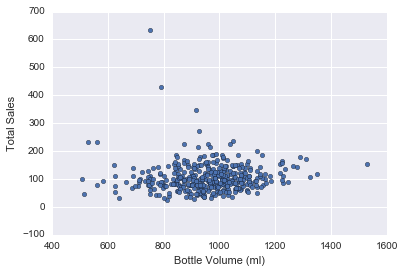

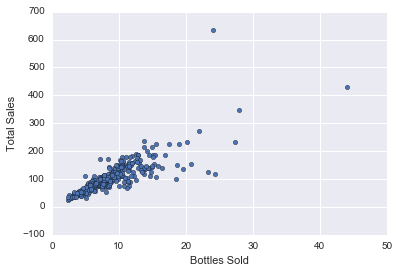

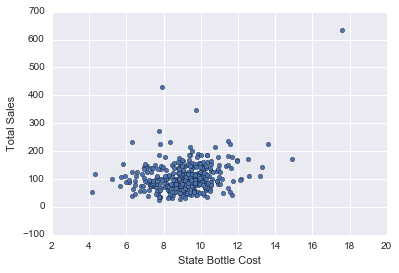

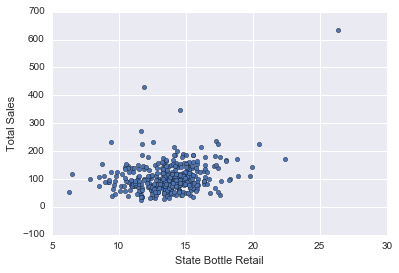

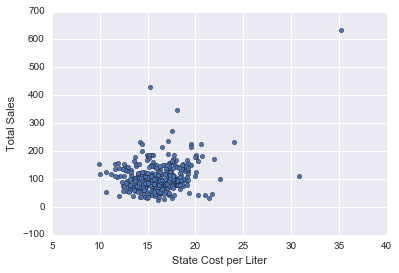

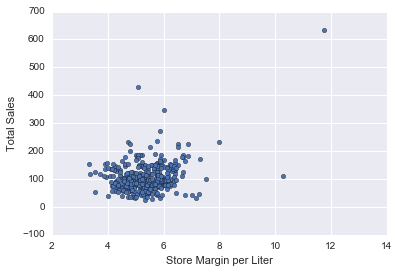

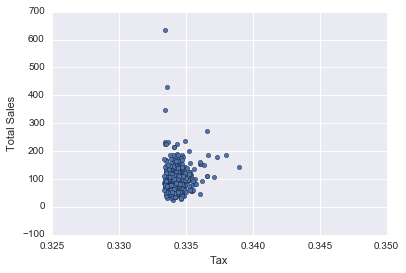

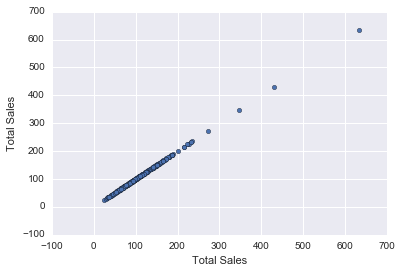

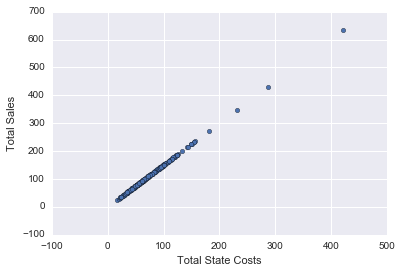

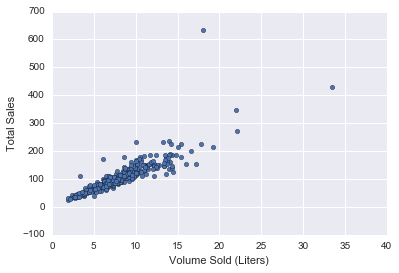

In [364]:
for column in ["Margin", "Bottle Volume (ml)", "Bottles Sold", "State Bottle Cost", "State Bottle Retail", "State Cost per Liter", "Store Margin per Liter", "Tax", "Total Sales", "Total State Costs", "Volume Sold (Liters)" ]:
    cityMeanSales.plot.scatter(x=column, y="Total Sales")

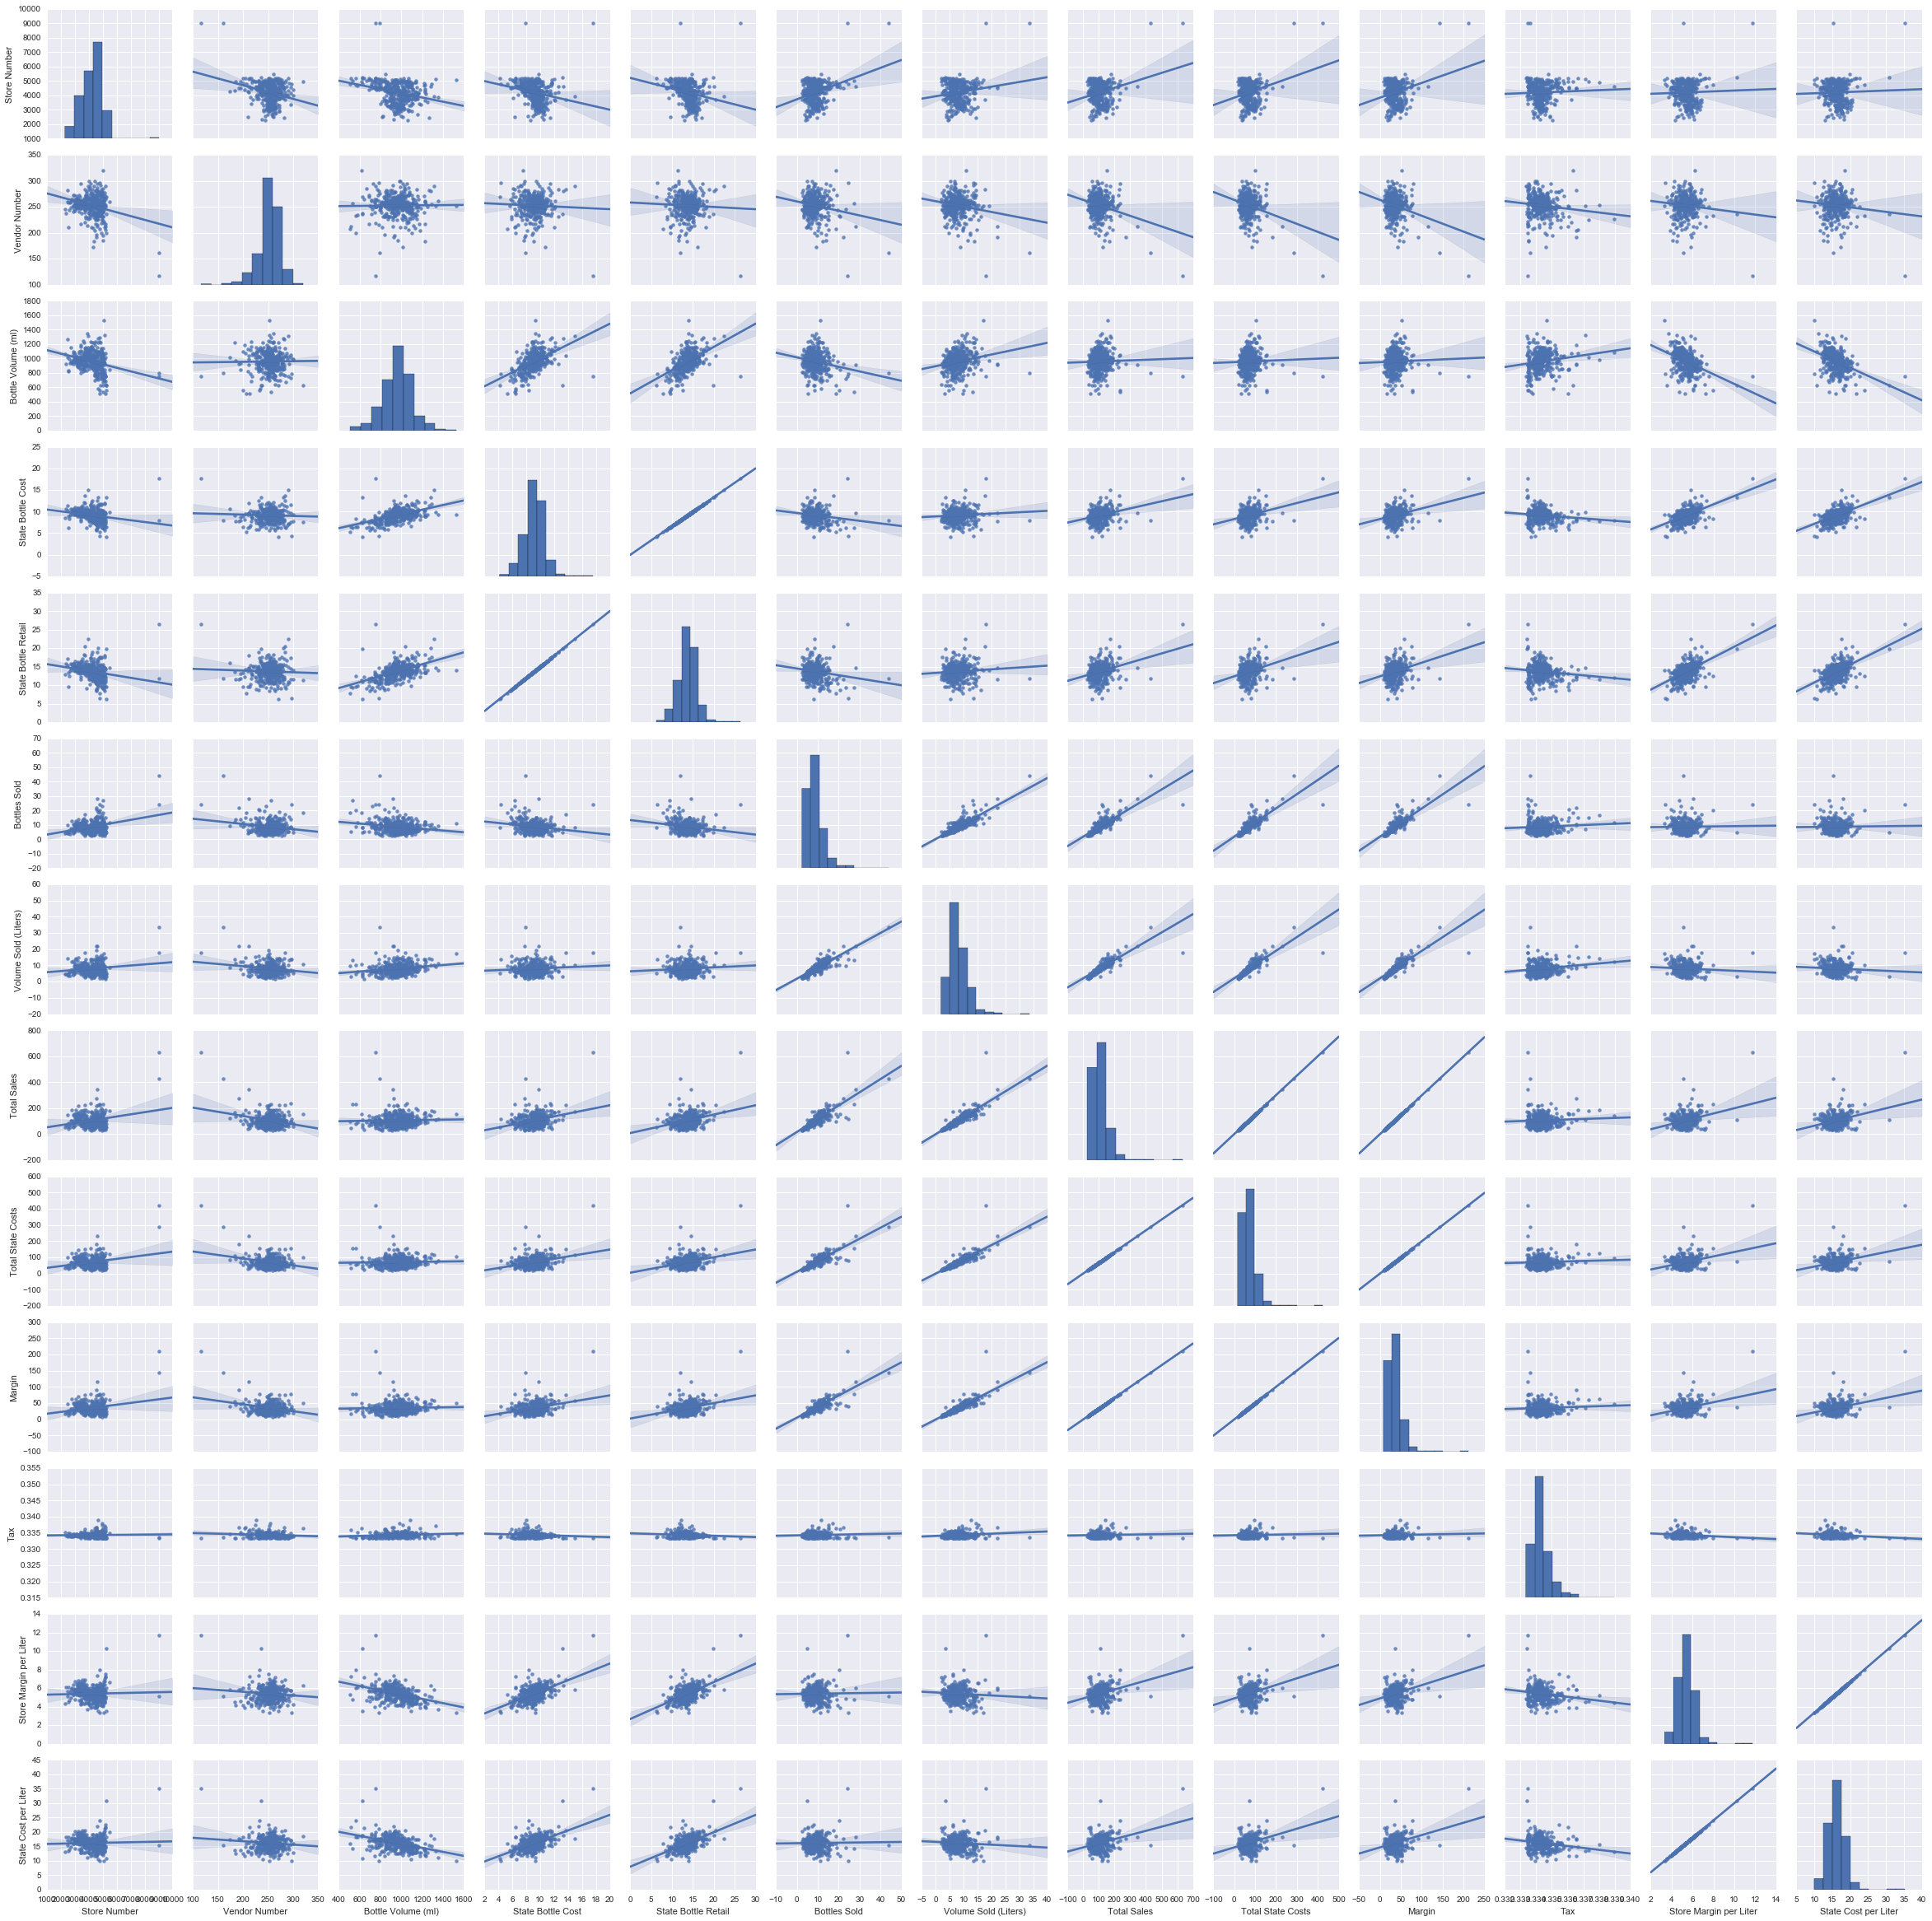

In [366]:
sns.pairplot(cityMeanSales, kind = 'reg')

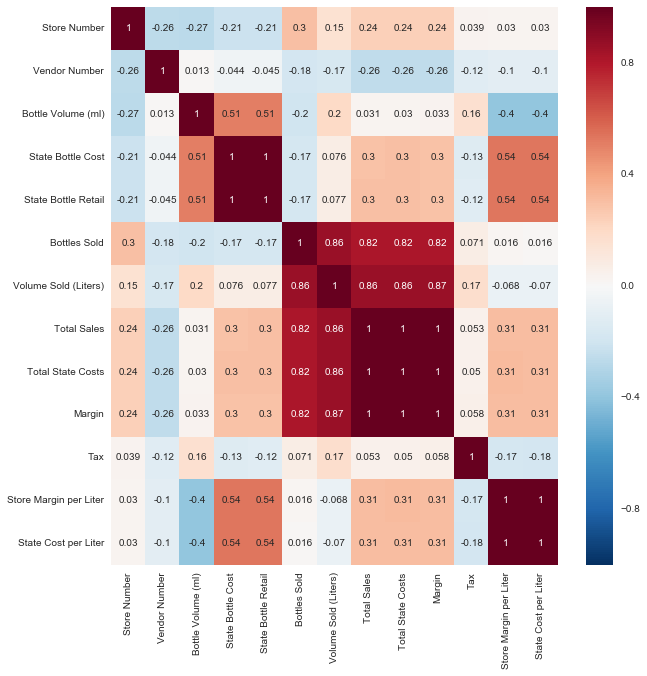

In [376]:
corr = cityMeanSales.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True)

# Other interesting things

In [413]:
grad = pd.read_csv('/Users/Paul/Desktop/General_Assembly/DSI_SM_01/projects/01-projects-weekly/project-03/IowaGradRate.csv')
grad = grad[[0,1]]
grad.head()

Zip High School Graduate or higher
0  50001                          88.8%
1  50002                          87.6%
2  50003                          91.0%
3  50005                          80.8%
4  50006                          88.9%

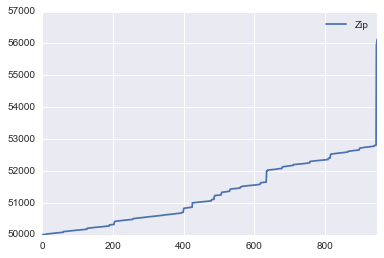

In [438]:
grad.plot()
plt.show()

In [431]:
population = '/Users/Paul/Desktop/General_Assembly/DSI_SM_01/projects/01-projects-weekly/project-03/PEP_2015_PEPANNRES/PEP_2015_PEPANNRES_with_ann.csv'

census = pd.read_csv(population)
census.head(2)

GEO.id GEO.id2   GEO.display-label             rescen42010  \
0              Id     Id2           Geography  April 1, 2010 - Census   
1  0500000US19001   19001  Adair County, Iowa                    7682   

                     resbase42010                                respop72010  \
0  April 1, 2010 - Estimates Base  Population Estimate (as of July 1) - 2010   
1                            7682                                       7665   

                                 respop72011  \
0  Population Estimate (as of July 1) - 2011   
1                                       7562   

                                 respop72012  \
0  Population Estimate (as of July 1) - 2012   
1                                       7488   

                                 respop72013  \
0  Population Estimate (as of July 1) - 2013   
1                                       7436   

                                 respop72014  \
0  Population Estimate (as of July 1) - 2014   
1                                       7417   

                                 respop72015  
0  Population Estimate (as of July 1) - 2015  
1                                       7228

In [432]:
census = census[[2,3]][1::]
census.head(2)

GEO.display-label rescen42010
1  Adair County, Iowa        7682
2  Adams County, Iowa        4029

In [433]:
census['County'] = census[('GEO.display-label')].map(lambda x: x.rstrip(', Iowa'))
census['Population'] = census[['rescen42010']].astype(int)

census.head(2)

GEO.display-label rescen42010        County  Population
1  Adair County, Iowa        7682  Adair County        7682
2  Adams County, Iowa        4029  Adams County        4029

In [434]:
census = census[[2,3]][::]
census.head()

County  Population
1      Adair County        7682
2      Adams County        4029
3  Allamakee County       14330
4  Appanoose County       12887
5    Audubon County        6119

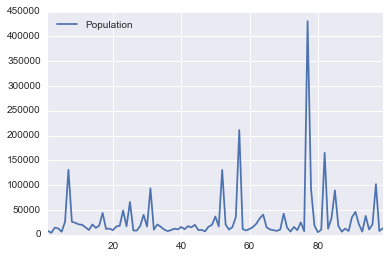

In [437]:
import matplotlib.pyplot as plt
%matplotlib inline

census.plot()
plt.show()

# Calculate the yearly liquor sales for each store using the provided data. 

In [377]:
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20151231")
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
sales = df[mask]


df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date1 = pd.Timestamp("20160101")
end_date1 = pd.Timestamp("20161231")
mask1 = (df['Date'] >= start_date1) & (df['Date'] <= end_date1)
sales1 = df[mask1]

In [378]:
fifteen = sales.sort_values(by='Date', ascending = True)


sixteen = sales1.sort_values(by='Date', ascending = True)

fifteen.head(2)

Date  Store Number        City Zip Code      County  \
40009  2015-01-05          2549   INDIANOLA    50125      Warren   
195066 2015-01-05          4898  BURLINGTON    52601  Des Moines   

          Category Name  Vendor Number           Item Description  \
40009   WHISKEY LIQUEUR            421  Fireball Cinnamon Whiskey   
195066   VODKA 80 PROOF            260      Smirnoff Vodka 80 Prf   

        Bottle Volume (ml)  State Bottle Cost  State Bottle Retail  \
40009                 1000              11.34                17.01   
195066                 375               4.75                 7.13   

        Bottles Sold Sale (Dollars)  Volume Sold (Liters)  Total Sales  \
40009           12.0         204.12                  12.0       204.12   
195066          24.0         171.12                   9.0       171.12   

        Total State Costs  Margin       Tax  Store Margin per Liter  \
40009              136.08   68.04  0.333333                5.670000   
195066             114.00   57.12  0.333801                6.346667   

        State Cost per Liter  
40009              17.010000  
195066             19.013333

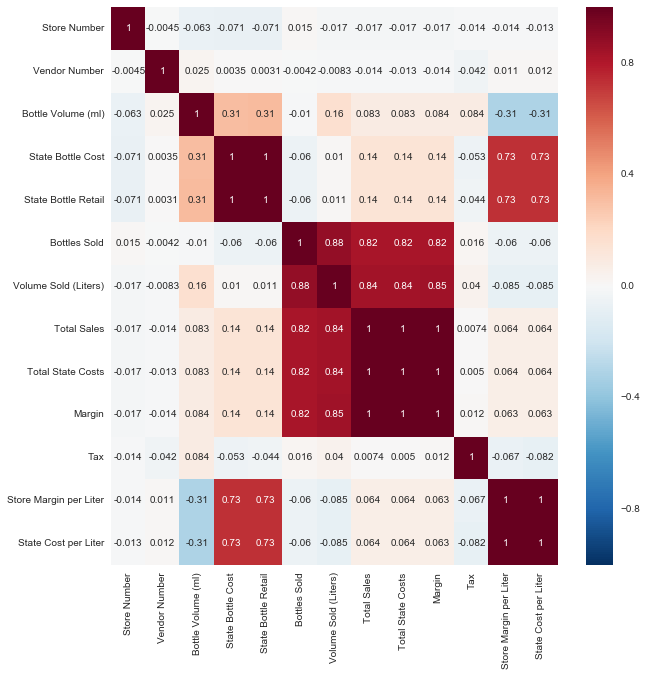

In [380]:
corr = fifteen.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot = True)

# Use the data from 2015 to make a linear model using as many variables as you find useful to predict the yearly sales of each store.

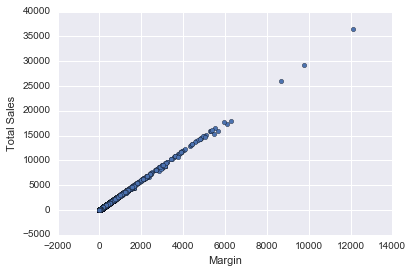

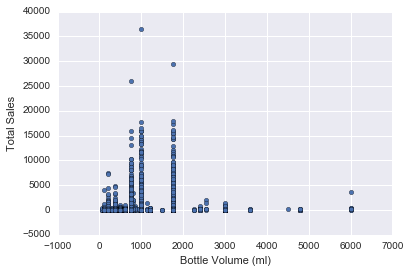

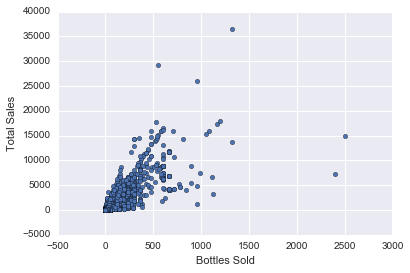

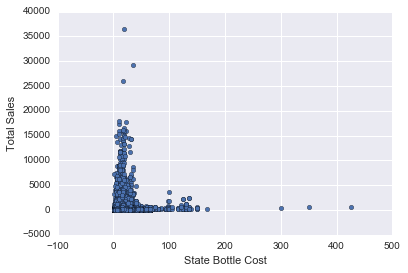

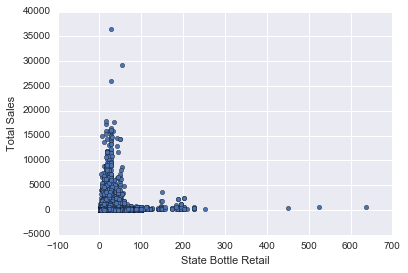

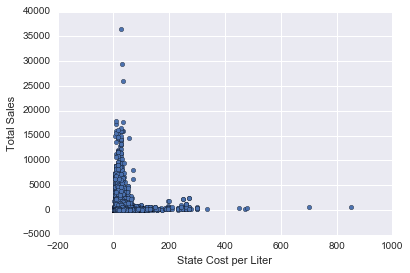

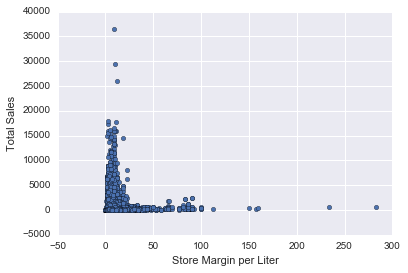

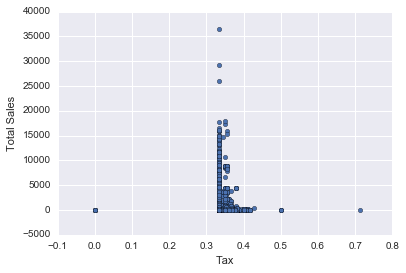

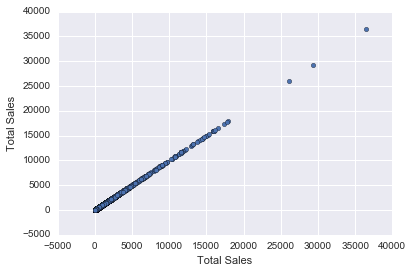

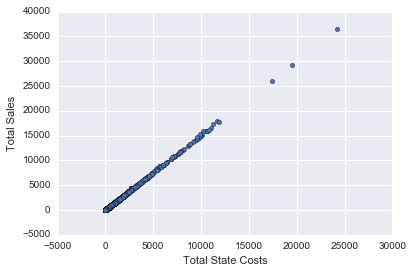

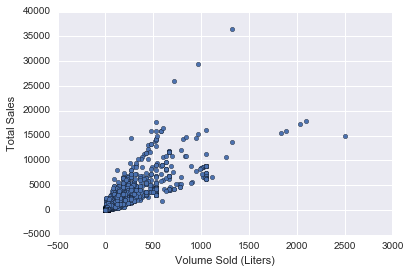

In [382]:
for column in ["Margin", "Bottle Volume (ml)", "Bottles Sold", "State Bottle Cost", "State Bottle Retail", "State Cost per Liter", "Store Margin per Liter", "Tax", "Total Sales", "Total State Costs", "Volume Sold (Liters)" ]:
    fifteen.plot.scatter(x=column, y="Total Sales")

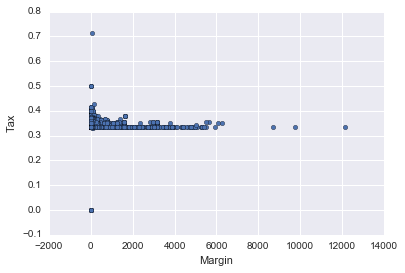

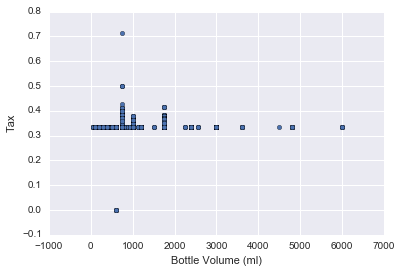

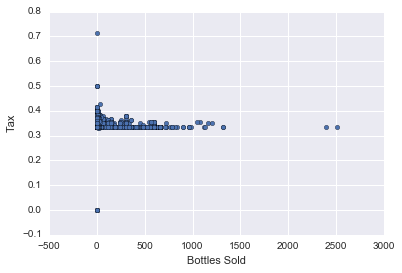

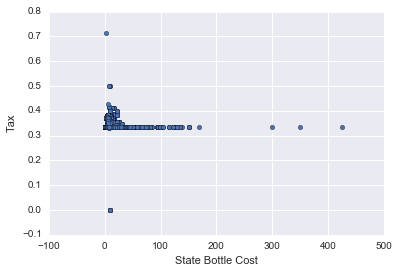

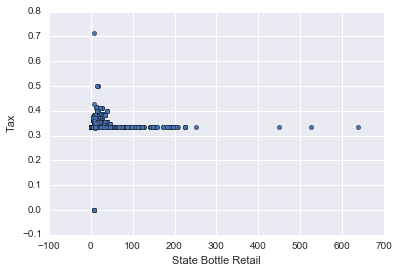

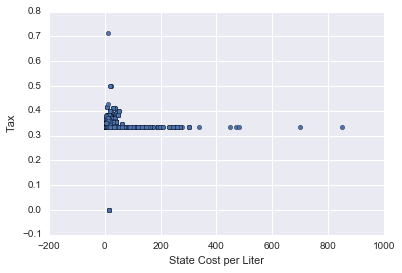

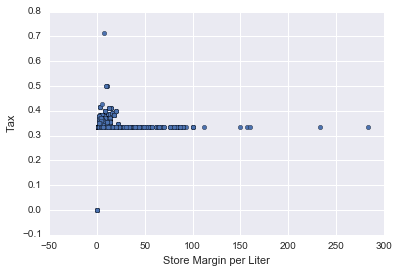

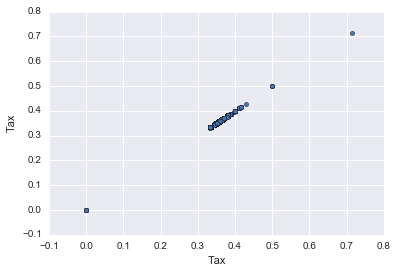

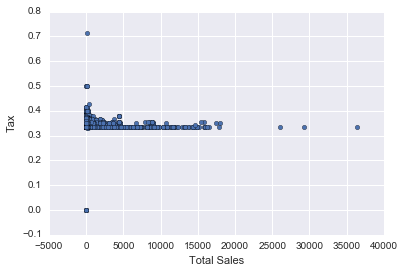

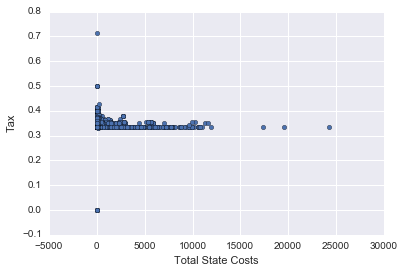

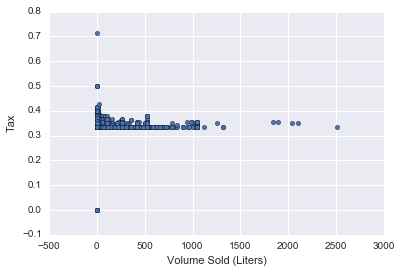

In [384]:
for column in ["Margin", "Bottle Volume (ml)", "Bottles Sold", "State Bottle Cost", "State Bottle Retail", "State Cost per Liter", "Store Margin per Liter", "Tax", "Total Sales", "Total State Costs", "Volume Sold (Liters)" ]:
    fifteen.plot.scatter(x=column, y="Tax")

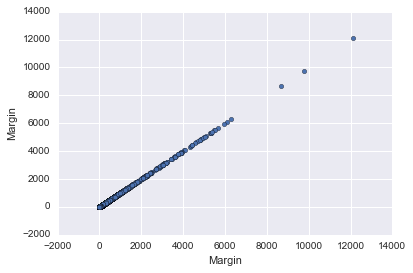

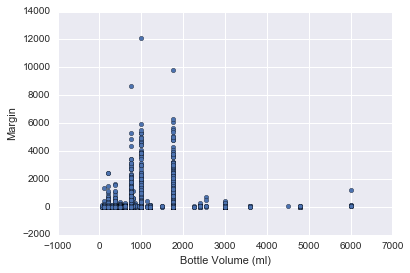

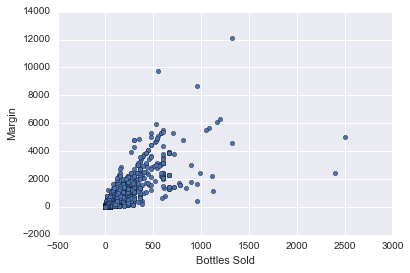

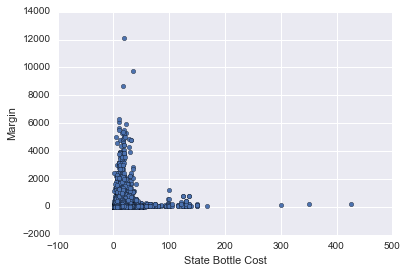

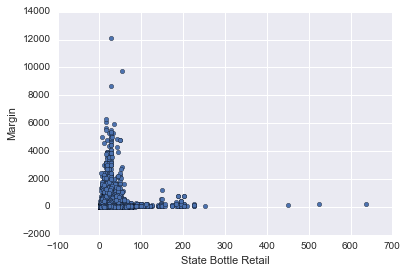

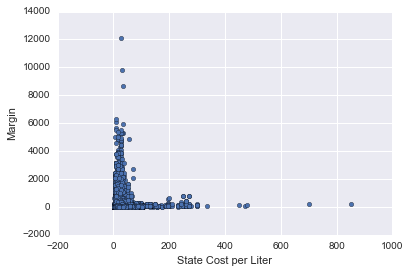

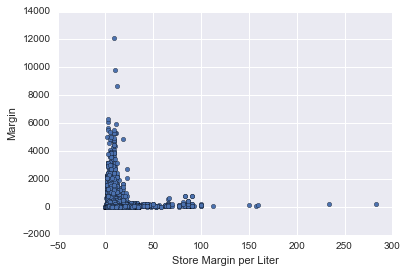

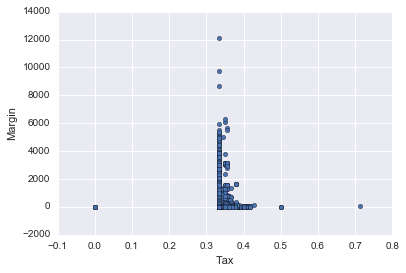

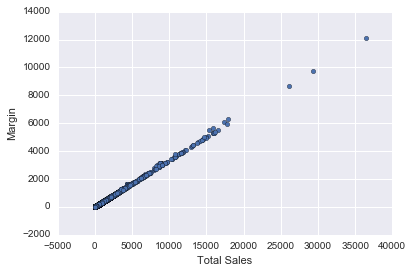

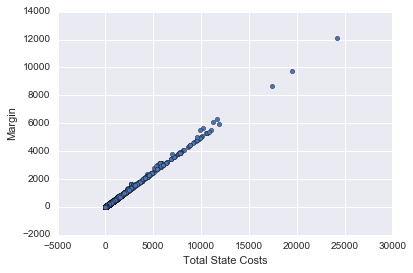

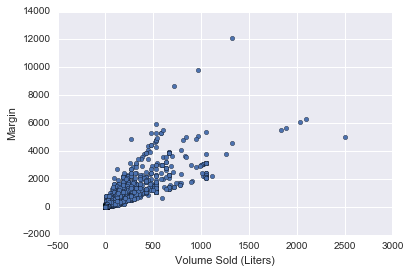

In [383]:
for column in ["Margin", "Bottle Volume (ml)", "Bottles Sold", "State Bottle Cost", "State Bottle Retail", "State Cost per Liter", "Store Margin per Liter", "Tax", "Total Sales", "Total State Costs", "Volume Sold (Liters)" ]:
    fifteen.plot.scatter(x=column, y="Margin")

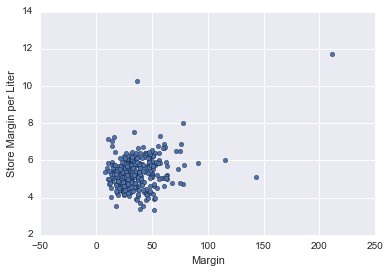

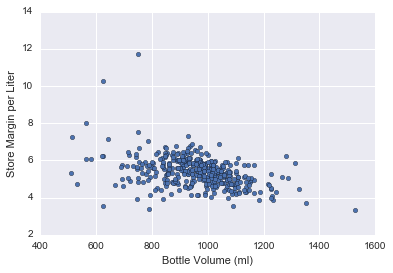

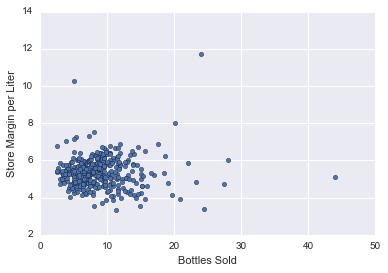

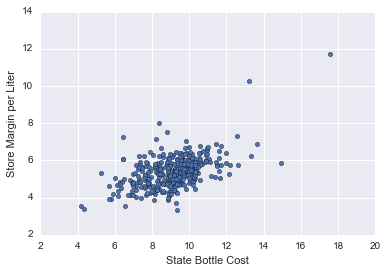

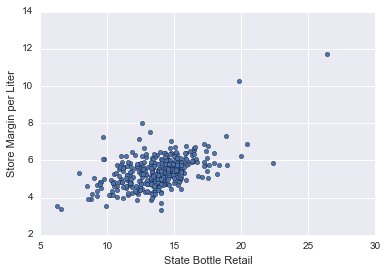

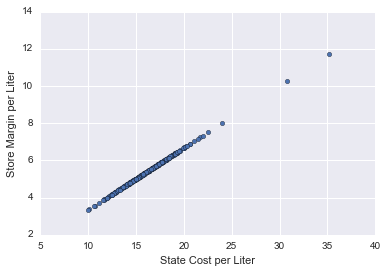

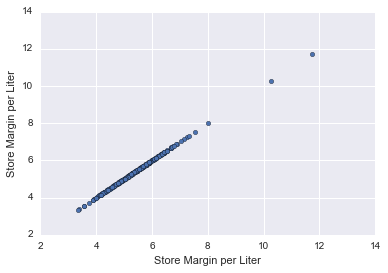

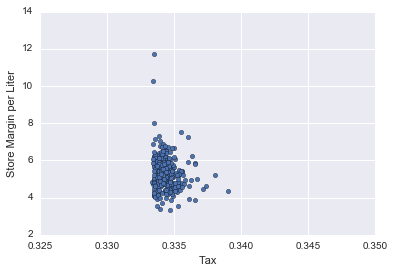

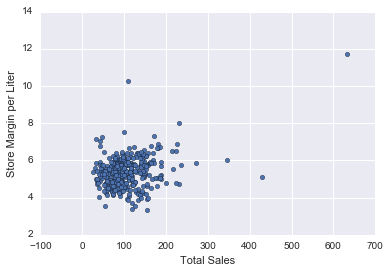

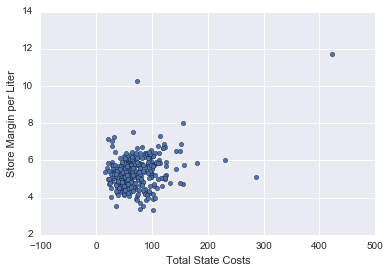

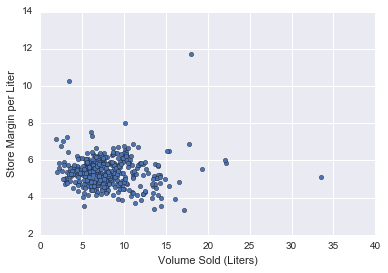

In [385]:
for column in ["Margin", "Bottle Volume (ml)", "Bottles Sold", "State Bottle Cost", "State Bottle Retail", "State Cost per Liter", "Store Margin per Liter", "Tax", "Total Sales", "Total State Costs", "Volume Sold (Liters)" ]:
    cityMeanSales.plot.scatter(x=column, y="Store Margin per Liter")

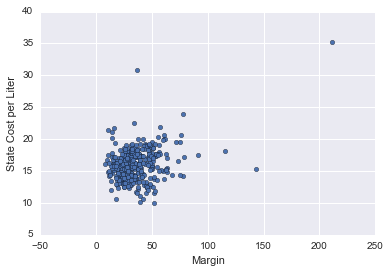

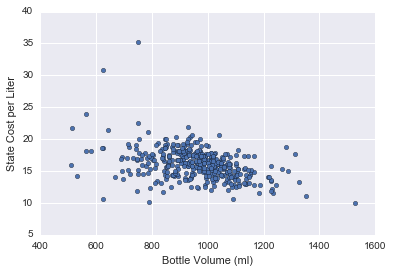

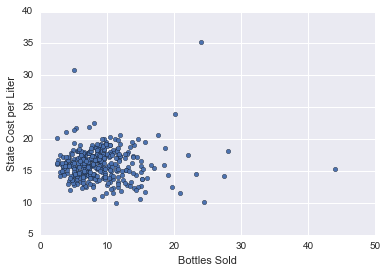

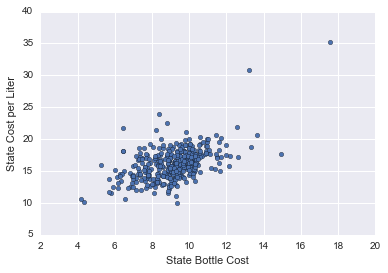

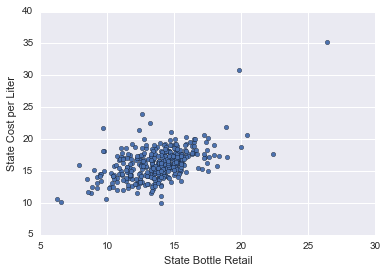

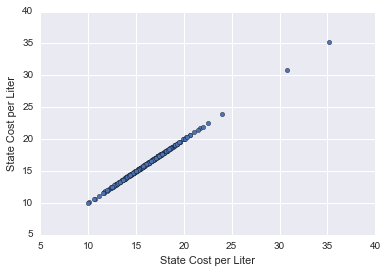

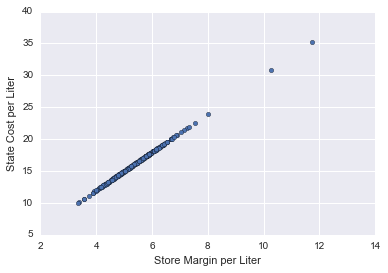

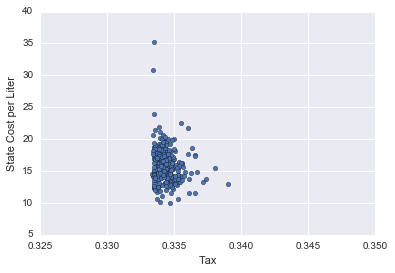

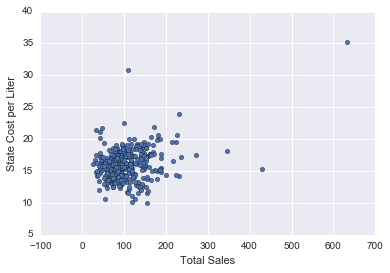

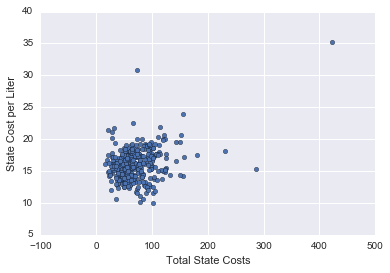

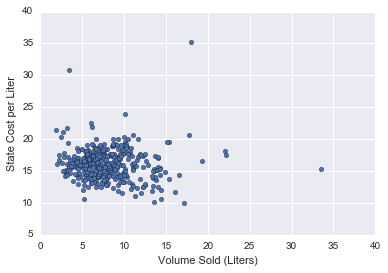

In [386]:
for column in ["Margin", "Bottle Volume (ml)", "Bottles Sold", "State Bottle Cost", "State Bottle Retail", "State Cost per Liter", "Store Margin per Liter", "Tax", "Total Sales", "Total State Costs", "Volume Sold (Liters)" ]:
    cityMeanSales.plot.scatter(x=column, y="State Cost per Liter")

# You must use the sales from Jan to March per store as one of your variables.

In [387]:
fifteen.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20150331")
mask = (fifteen['Date'] >= start_date) & (fifteen['Date'] <= end_date)
salestestfifteen = fifteen[mask]

In [389]:
salestestfifteen.head(2)

Date  Store Number         City Zip Code      County  \
22111  2015-01-08          2106  CEDAR FALLS    50613  Black Hawk   
110707 2015-01-08          2106  CEDAR FALLS    50613  Black Hawk   

                             Category Name  Vendor Number  \
22111     PUERTO RICO & VIRGIN ISLANDS RUM             35   
110707  MISC. AMERICAN CORDIALS & LIQUEURS            322   

            Item Description  Bottle Volume (ml)  State Bottle Cost  \
22111   Bacardi Superior Rum                1000                9.5   
110707            Kinky Blue                 750               10.0   

        State Bottle Retail  Bottles Sold Sale (Dollars)  \
22111                 14.25          36.0         513.00   
110707                15.00          12.0         180.00   

        Volume Sold (Liters)  Total Sales  Total State Costs  Margin  \
22111                   36.0        513.0              342.0   171.0   
110707                   9.0        180.0              120.0    60.0   

             Tax  Store Margin per Liter  State Cost per Liter  
22111   0.333333                4.750000                 14.25  
110707  0.333333                6.666667                 20.00

In [390]:
sixteen.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20160101")
end_date = pd.Timestamp("20160331")
mask = (sixteen['Date'] >= start_date) & (sixteen['Date'] <= end_date)
salestestsixteen = sixteen[mask]

In [410]:
sixteenSales = salestestsixteen.groupby(['Store Number','Date'])

In [411]:
sixteenSales.head()

Date  Store Number         City Zip Code      County  \
60439  2016-01-07          2106  CEDAR FALLS    50613  Black Hawk   
63210  2016-01-07          2106  CEDAR FALLS    50613  Black Hawk   
20650  2016-01-07          2106  CEDAR FALLS    50613  Black Hawk   
21877  2016-01-07          2106  CEDAR FALLS    50613  Black Hawk   
57547  2016-01-07          2106  CEDAR FALLS    50613  Black Hawk   
239426 2016-01-14          2106  CEDAR FALLS    50613  Black Hawk   
171352 2016-01-14          2106  CEDAR FALLS    50613  Black Hawk   
136459 2016-01-14          2106  CEDAR FALLS    50613  Black Hawk   
114792 2016-01-14          2106  CEDAR FALLS    50613  Black Hawk   
95188  2016-01-14          2106  CEDAR FALLS    50613  Black Hawk   
12527  2016-01-21          2106  CEDAR FALLS    50613  Black Hawk   
35841  2016-01-21          2106  CEDAR FALLS    50613  Black Hawk   
83628  2016-01-21          2106  CEDAR FALLS    50613  Black Hawk   
122278 2016-01-21          2106  CEDAR FALLS    50613  Black Hawk   
206911 2016-01-21          2106  CEDAR FALLS    50613  Black Hawk   
270442 2016-01-28          2106  CEDAR FALLS    50613  Black Hawk   
268943 2016-01-28          2106  CEDAR FALLS    50613  Black Hawk   
246082 2016-01-28          2106  CEDAR FALLS    50613  Black Hawk   
229812 2016-01-28          2106  CEDAR FALLS    50613  Black Hawk   
179895 2016-01-28          2106  CEDAR FALLS    50613  Black Hawk   
5879   2016-02-04          2106  CEDAR FALLS    50613  Black Hawk   
3080   2016-02-04          2106  CEDAR FALLS    50613  Black Hawk   
33255  2016-02-04          2106  CEDAR FALLS    50613  Black Hawk   
36101  2016-02-04          2106  CEDAR FALLS    50613  Black Hawk   
240655 2016-02-04          2106  CEDAR FALLS    50613  Black Hawk   
72140  2016-02-11          2106  CEDAR FALLS    50613  Black Hawk   
121027 2016-02-11          2106  CEDAR FALLS    50613  Black Hawk   
141407 2016-02-11          2106  CEDAR FALLS    50613  Black Hawk   
219064 2016-02-11          2106  CEDAR FALLS    50613  Black Hawk   
29212  2016-02-11          2106  CEDAR FALLS    50613  Black Hawk   
...           ...           ...          ...      ...         ...   
65445  2016-03-21          5236      ANAMOSA    52205         NaN   
72399  2016-03-21          5236      ANAMOSA    52205         NaN   
73695  2016-03-21          5236      ANAMOSA    52205         NaN   
81452  2016-03-21          5236      ANAMOSA    52205         NaN   
175038 2016-03-22          5237   FORT DODGE    50501         NaN   
213235 2016-03-22          5237   FORT DODGE    50501         NaN   
215118 2016-03-22          5237   FORT DODGE    50501         NaN   
243246 2016-03-22          5237   FORT DODGE    50501         NaN   
261873 2016-03-22          5237   FORT DODGE    50501         NaN   
213284 2016-03-29          5237   FORT DODGE    50501         NaN   
96228  2016-03-31          5240  WEST BRANCH    52358         NaN   
98117  2016-03-31          5240  WEST BRANCH    52358         NaN   
238850 2016-03-31          5240  WEST BRANCH    52358         NaN   
240866 2016-03-31          5240  WEST BRANCH    52358         NaN   
93326  2016-03-31          5240  WEST BRANCH    52358         NaN   
66166  2016-03-31          5247     ROCKWELL    50469         NaN   
90257  2016-03-31          5247     ROCKWELL    50469         NaN   
186150 2016-03-31          5247     ROCKWELL    50469         NaN   
189515 2016-03-31          5247     ROCKWELL    50469         NaN   
194352 2016-03-31          5247     ROCKWELL    50469         NaN   
184427 2016-03-04          9001      SWISHER    52338     Johnson   
121038 2016-01-07          9002     LECLAIRE    52753       Scott   
17890  2016-01-07          9002     LECLAIRE    52753       Scott   
35520  2016-01-14          9002     LECLAIRE    52753       Scott   
154818 2016-01-21          9002     LECLAIRE    52753       Scott   
203593 2016-03-10          9002     LECLAIRE    52753       Scott   
28640  2016

r^2: 0.99971067182


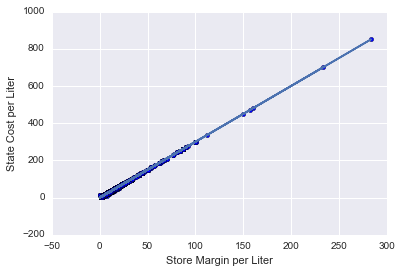

In [403]:
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split


lm = linear_model.LinearRegression()

X = fifteen[["Store Margin per Liter"]]
y = fifteen["State Cost per Liter"]

model = lm.fit(X, y)
predictions = lm.predict(X)

# Plot the data and the best fit line
## The data
plt.scatter(X, y)
## The line / model
plt.plot(X, predictions)
plt.ylabel("State Cost per Liter")
plt.xlabel("Store Margin per Liter")
print "r^2:", model.score(X,y)

In [404]:
for i, label in enumerate(fifteen.columns):
    for j, label in enumerate(fifteen.columns):
        if j >= i:
            continue
        X = fifteen[[label]]
        y = fifteen[label]

        model = lm.fit(X, y)
        predictions = lm.predict(X)

        print label1, label2, model.score(X,y)

TypeError: ufunc add cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

In [401]:
for i, label1 in enumerate(fifteen.columns):
    for j, label2 in enumerate(fifteen.columns):
        if j >= i:
            continue
        X = fifteen[[label1]]
        y = fifteen[label2]

        model = lm.fit(X, y)
        predictions = lm.predict(X)

        print label1, label2, model.score(X,y)

TypeError: ufunc add cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

r^2: 0.00415741588486


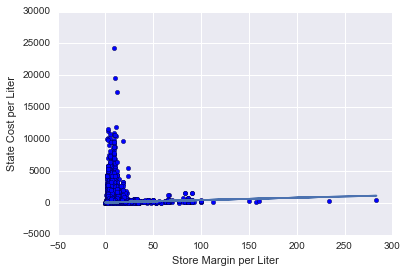

In [399]:
lm = linear_model.LinearRegression()

X = fifteen[["Store Margin per Liter"]]
y = fifteen["Total State Costs"]

model = lm.fit(X, y)
predictions = lm.predict(X)

# Plot the data and the best fit line
## The data
plt.scatter(X, y)
## The line / model
plt.plot(X, predictions)
plt.ylabel("State Cost per Liter")
plt.xlabel("Store Margin per Liter")
print "r^2:", model.score(X,y)

In [402]:
for i, label in enumerate(fifteen.columns):
    for j, label1 in enumerate(fifteen.columns):
        if j >= i:
            continue
        X = fifteen[[labe1]]
        y = fifteen[label1]

        model = lm.fit(X, y)
        predictions = lm.predict(X)

        print label1, label2, model.score(X,y)

NameError: name 'labe1' is not defined

In [395]:
import statsmodels.api as sm
# Solutions:

X = salestestfifteen["Total Sales"]
y = fifteen["Total Sales"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Total Sales")
plt.ylabel("Actual Total Sales")
plt.show()
print "MSE:", mean_squared_error(y, predictions)



X = salestestfifteen[["Total Sales", "Margin per Liter"]]
y = fifteen["Total Sales"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from Total Sales and Margin per Liter")
plt.ylabel("Actual Total Sales")
plt.show()
print "MSE:", mean_squared_error(y, predictions)



X = salestestfifteen
y = fifteen["Total Sales"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from 2015")
plt.ylabel("Actual Total Sales")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

ValueError: The indices for endog and exog are not aligned